**CISC 839 Topics in Data Analytics - 2024 Spring**  
**Dr. Yuan Tian**  

### Team Members
- **Alaa Abd Elhafez** - Student ID: 241106
- **Lamees Elbakr** - Student ID: 20481046
- **Nagham Rizk** - Student ID: 20481034
- **Zahraa El Tabakh** - Student ID: 20481041


<center>
    
# CISC 839 Section 001- 6
# Airbnb Price Prediction and Analysis

</center>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Bidirectional


# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2024-08-02 23:53:02.027400: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 23:53:02.031752: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 23:53:02.045223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 23:53:02.065821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 23:53:02.071992: E ext

# Lamees Elbakr

Working on EDA and basic preprocessing, I had worked on two datasets both for berlin 2023
1. First one is listings.csv where basic preprocessing, visualization  and dataexploration were done. This dataset where we apply modeling and models comparison 
2. Second dataset: after working we found that the data doesn't contains reviews rating or data about dataes to analysis another dataset file used where we apply analysis on prices and ratings also impact on months on prices

## Read the dataset and Explore it

In [105]:
df = pd.read_csv("listings.csv")
df_To_Analys = pd.read_csv("listings_Da.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,2023-05-25,0.87,1,80,1,First name and Last name: Nicolas Krotz Conta...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.08,1,52,0,03/Z/RA/003410-18
2,14325,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,93,26,2021-06-21,0.16,4,215,0,NaN
3,16644,Condo in Berlin · ★4.72 · 1 bedroom · 3 beds ·...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,92,93,48,2017-12-14,0.30,2,113,0,NaN
4,17904,Rental unit in Berlin · ★4.77 · Studio · 1 bed...,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,25,92,299,2022-12-01,1.84,1,41,1,NaN


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.247200e+04,1.247200e+04,12472.000000,12472.000000,12472.000000,12472.000000,12472.000000,10101.000000,12472.000000,12472.000000,12472.000000
mean,1.843407e+17,1.324328e+08,52.509825,13.402560,115.166774,44.695157,36.575609,1.121521,7.149615,117.180244,9.580420
std,3.265646e+17,1.543578e+08,0.033451,0.066462,195.676946,54.849129,78.560591,1.858754,22.376246,131.406602,21.436469
min,3.176000e+03,1.581000e+03,52.369040,13.107580,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.518332e+07,1.274679e+07,52.490267,13.363287,50.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,3.434609e+07,5.274744e+07,52.509855,13.411470,81.000000,7.000000,7.000000,0.480000,1.000000,52.000000,1.000000
75%,5.415847e+07,2.165418e+08,52.532335,13.438000,140.000000,92.000000,33.000000,1.530000,3.000000,243.000000,10.000000
max,9.188887e+17,5.211785e+08,52.656110,13.721390,9999.000000,1100.000000,2074.000000,65.330000,172.000000,365.000000,764.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12472 non-null  int64  
 1   name                            12472 non-null  object 
 2   host_id                         12472 non-null  int64  
 3   host_name                       12462 non-null  object 
 4   neighbourhood_group             12472 non-null  object 
 5   neighbourhood                   12472 non-null  object 
 6   latitude                        12472 non-null  float64
 7   longitude                       12472 non-null  float64
 8   room_type                       12472 non-null  object 
 9   price                           12472 non-null  int64  
 10  minimum_nights                  12472 non-null  int64  
 11  number_of_reviews               12472 non-null  int64  
 12  last_review                     

## Preprocessing operations
1. drop non required data
2. Missing Values hadling

In [6]:
# drop columns which are not required for the analysis
df.drop(['id','host_name','last_review'], axis = 1, inplace = True)

In [7]:
#Count Null values in each column
df.isna().sum()

name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2371
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6630
dtype: int64

In [8]:
# fill null values in columns if its sum is greater than 750 and drop others
for col in df.columns:
    if (df[col].isna().sum() > 750) :
        if df[col].dtype == 'object':
                mode_value = df[col].mode()[0]  # Mode for object columns
                df[col].fillna(mode_value, inplace=True)
        else:
                mean_value = df[col].mean()  # Mean for numeric columns
                df[col].fillna(mean_value, inplace=True)
    else :
        df[col].dropna()




0        Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...
1        Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...
2        Rental unit in Berlin · ★4.67 · Studio · 1 bed...
3        Condo in Berlin · ★4.72 · 1 bedroom · 3 beds ·...
4        Rental unit in Berlin · ★4.77 · Studio · 1 bed...
                               ...                        
12467    Rental unit in Berlin · ★New · 3 bedrooms · 3 ...
12468    Rental unit in Berlin · ★New · 3 bedrooms · 3 ...
12469    Rental unit in Berlin · ★New · 1 bedroom · 1 b...
12470    Condo in Berlin · ★New · 1 bedroom · 1 bed · 1...
12471    Rental unit in Berlin · ★New · 1 bedroom · 1 b...
Name: name, Length: 12472, dtype: object

0             3718
1            33852
2            55531
3            64696
4            68997
           ...    
12467    271235180
12468    271235180
12469    518215178
12470     36023494
12471      1170958
Name: host_id, Length: 12472, dtype: int64

0                          Pankow
1                          Pankow
2                          Pankow
3        Friedrichshain-Kreuzberg
4                        Neukölln
                   ...           
12467                       Mitte
12468    Friedrichshain-Kreuzberg
12469       Steglitz - Zehlendorf
12470      Tempelhof - Schöneberg
12471      Tempelhof - Schöneberg
Name: neighbourhood_group, Length: 12472, dtype: object

0         Prenzlauer Berg Südwest
1         Prenzlauer Berg Südwest
2        Prenzlauer Berg Nordwest
3           nördliche Luisenstadt
4                    Reuterstraße
                   ...           
12467               Osloer Straße
12468        südliche Luisenstadt
12469            Zehlendorf  Nord
12470             Schöneberg-Nord
12471                   Tempelhof
Name: neighbourhood, Length: 12472, dtype: object

0        52.534710
1        52.532690
2        52.548130
3        52.503120
4        52.494190
           ...    
12467    52.555156
12468    52.497140
12469    52.451515
12470    52.492474
12471    52.456304
Name: latitude, Length: 12472, dtype: float64

0        13.418100
1        13.418050
2        13.403660
3        13.435080
4        13.421660
           ...    
12467    13.390270
12468    13.440311
12469    13.252743
12470    13.361252
12471    13.384450
Name: longitude, Length: 12472, dtype: float64

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
12467    Entire home/apt
12468    Entire home/apt
12469       Private room
12470    Entire home/apt
12471    Entire home/apt
Name: room_type, Length: 12472, dtype: object

0         83
1        180
2         70
3         92
4         25
        ... 
12467    117
12468    120
12469     55
12470     40
12471     54
Name: price, Length: 12472, dtype: int64

0        63
1         6
2        93
3        93
4        92
         ..
12467    92
12468    92
12469    12
12470    92
12471    92
Name: minimum_nights, Length: 12472, dtype: int64

0        148
1          8
2         26
3         48
4        299
        ... 
12467      0
12468      0
12469      0
12470      0
12471      0
Name: number_of_reviews, Length: 12472, dtype: int64

/tmp/ipykernel_484447/961731835.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


0         1
1         1
2         4
3         2
4         1
         ..
12467    25
12468    25
12469     1
12470     1
12471     1
Name: calculated_host_listings_count, Length: 12472, dtype: int64

0         80
1         52
2        215
3        113
4         41
        ... 
12467    295
12468    301
12469    365
12470    362
12471    364
Name: availability_365, Length: 12472, dtype: int64

0        1
1        0
2        0
3        0
4        1
        ..
12467    0
12468    0
12469    0
12470    0
12471    0
Name: number_of_reviews_ltm, Length: 12472, dtype: int64

/tmp/ipykernel_484447/961731835.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [9]:
# check null values after missing values hadling
df.isna().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

Now we need to check how many rows and columns the dataset is having. It is also necessary to check how many unique values are present for each column. For this we will also use the nunique.


In [10]:
print('\nRows   :',df.shape[0])
print('\nColumns:',df.shape[1])
print('\nColumns names:',df.columns)
print(' \nUnique:\n',df.nunique())


Rows   : 12472

Columns: 15

Columns names: Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')
 
Unique:
 name                              4048
host_id                           8894
neighbourhood_group                 12
neighbourhood                      136
latitude                          8472
longitude                         9530
room_type                            4
price                              513
minimum_nights                      95
number_of_reviews                  448
reviews_per_month                  680
calculated_host_listings_count      34
availability_365                   366
number_of_reviews_ltm              140
license                           4871
dtype: int64


## Plot Correlation Matrix

<Figure size 2000x2000 with 0 Axes>

<Axes: >

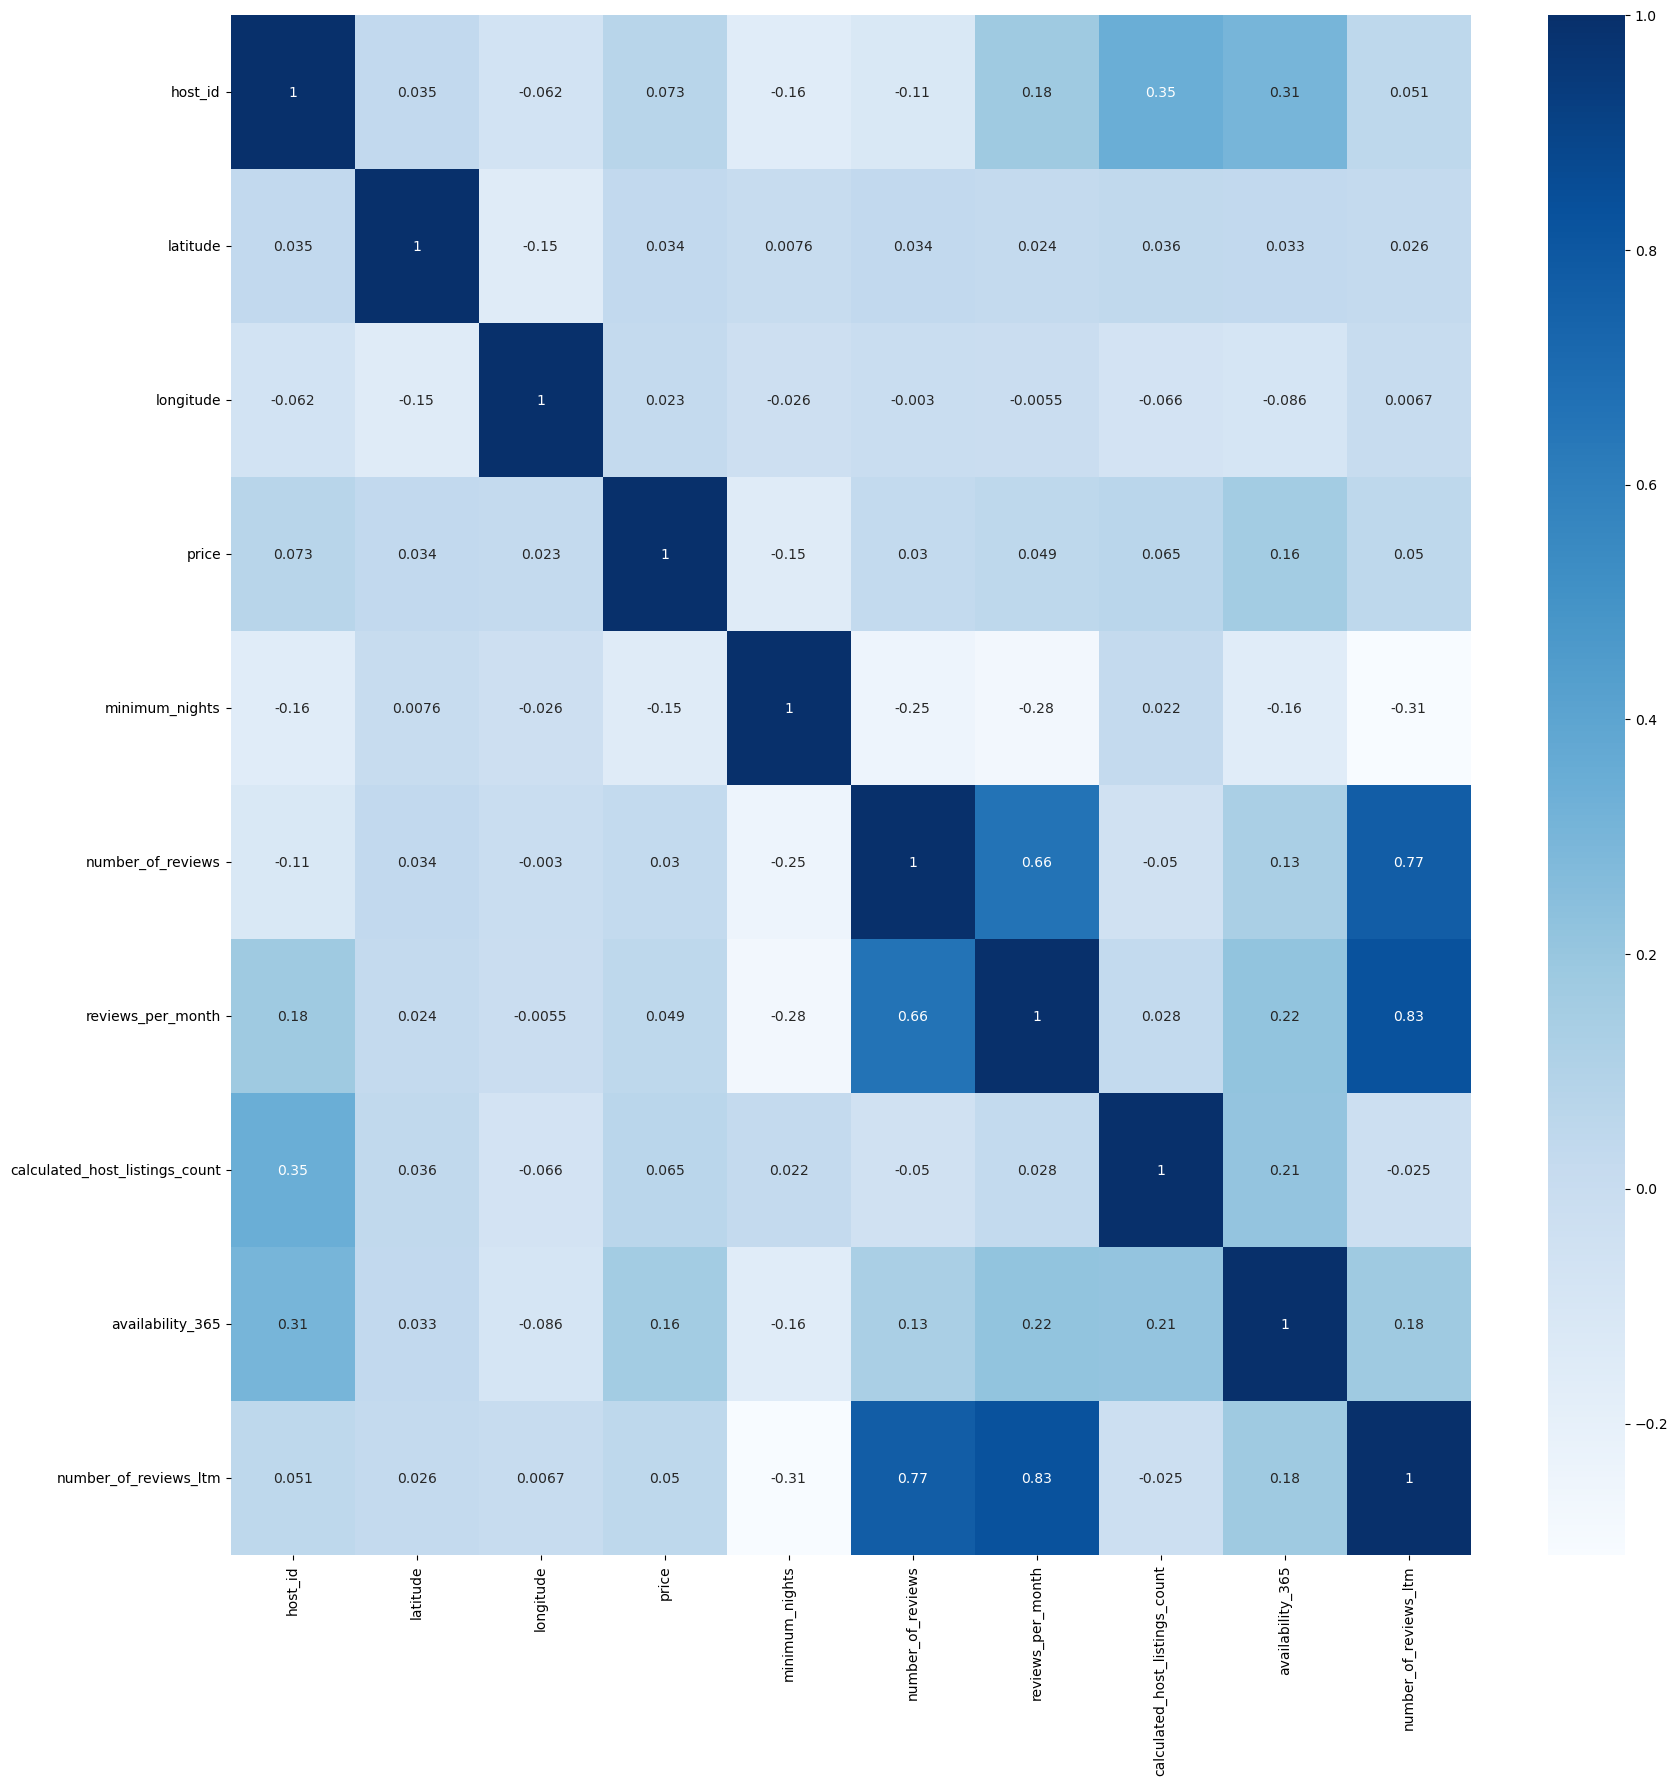

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix with numeric_only=True
corr_matrix = numeric_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True,cmap="Blues")
plt.show()




## Scatter Plot to show the neighbourhood group based on Latitude and Longitude

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.



<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='longitude', ylabel='latitude'>

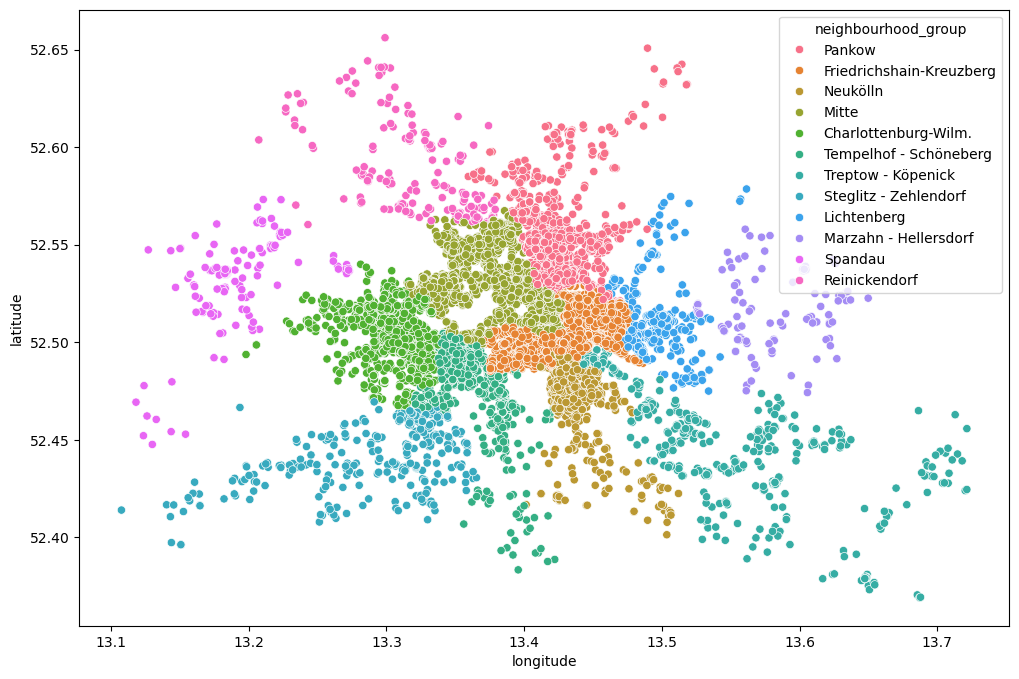

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

### Unique Values

It is very important to understand and analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice. We will take Room Type and neighbourhood_cleansed

From the below, we have 4 types of room in the dataset and 12 different neighbourhood group. In the next section we will explore more on these two categories to understand the user distribution.


In [13]:
print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood_group.unique())

Unique value for room_type are : ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Unique value for neighbourhood_group are : ['Pankow' 'Friedrichshain-Kreuzberg' 'Neukölln' 'Mitte'
 'Charlottenburg-Wilm.' 'Tempelhof - Schöneberg' 'Treptow - Köpenick'
 'Steglitz - Zehlendorf' 'Lichtenberg' 'Marzahn - Hellersdorf' 'Spandau'
 'Reinickendorf']


### Room Types and Neighbourhood Group

We will check the distribution of the room type and neighbourhood group for the data.

### From the below its clear the :

1. Regarding Room Type : Apartment and Private data is more than that of shared  and hotel rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less, we will still try to uncover as much details as we can. also hotel rooms is very expensive compared to entire home thus entire home is preferred by families


<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_484447/226977757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='viridis')


<Axes: xlabel='room_type', ylabel='count'>

Text(0.5, 1.0, 'Count of Room Types')

Text(0.5, 0, 'Room Type')

Text(0, 0.5, 'Count')

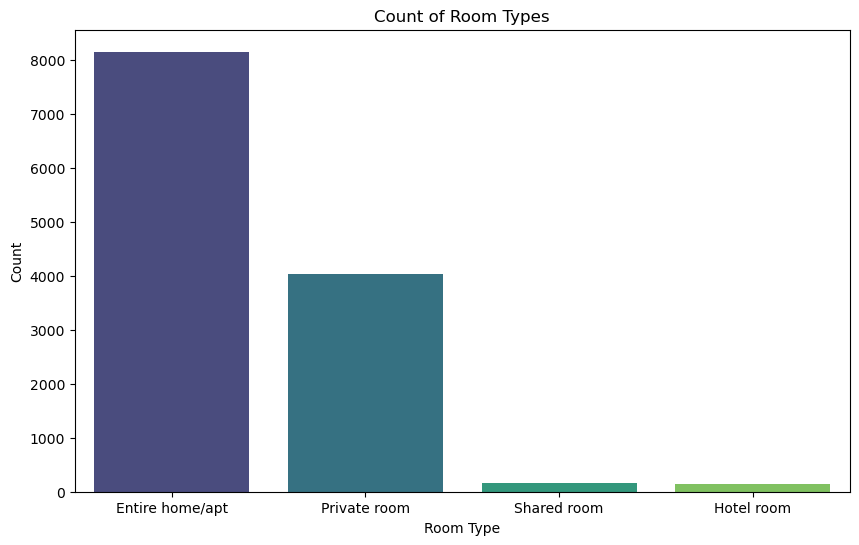

In [14]:
# Plot the count plot with colors
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### From the below its clear the :

2. Regarding Neighbourhood Group : We can see here, that most of the properties fall in Friedrichshain-Kreuzberg and Mitte neighbourhood group, while there very few properties in Marzahn - Hellersdorf and Spandau.


<Figure size 3000x1500 with 0 Axes>

/tmp/ipykernel_484447/4287948983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='viridis')


<Axes: xlabel='neighbourhood_group', ylabel='count'>

Text(0.5, 1.0, 'Count of Neighbourhood Groups')

Text(0.5, 0, 'Neighbourhood Group')

Text(0, 0.5, 'Count')

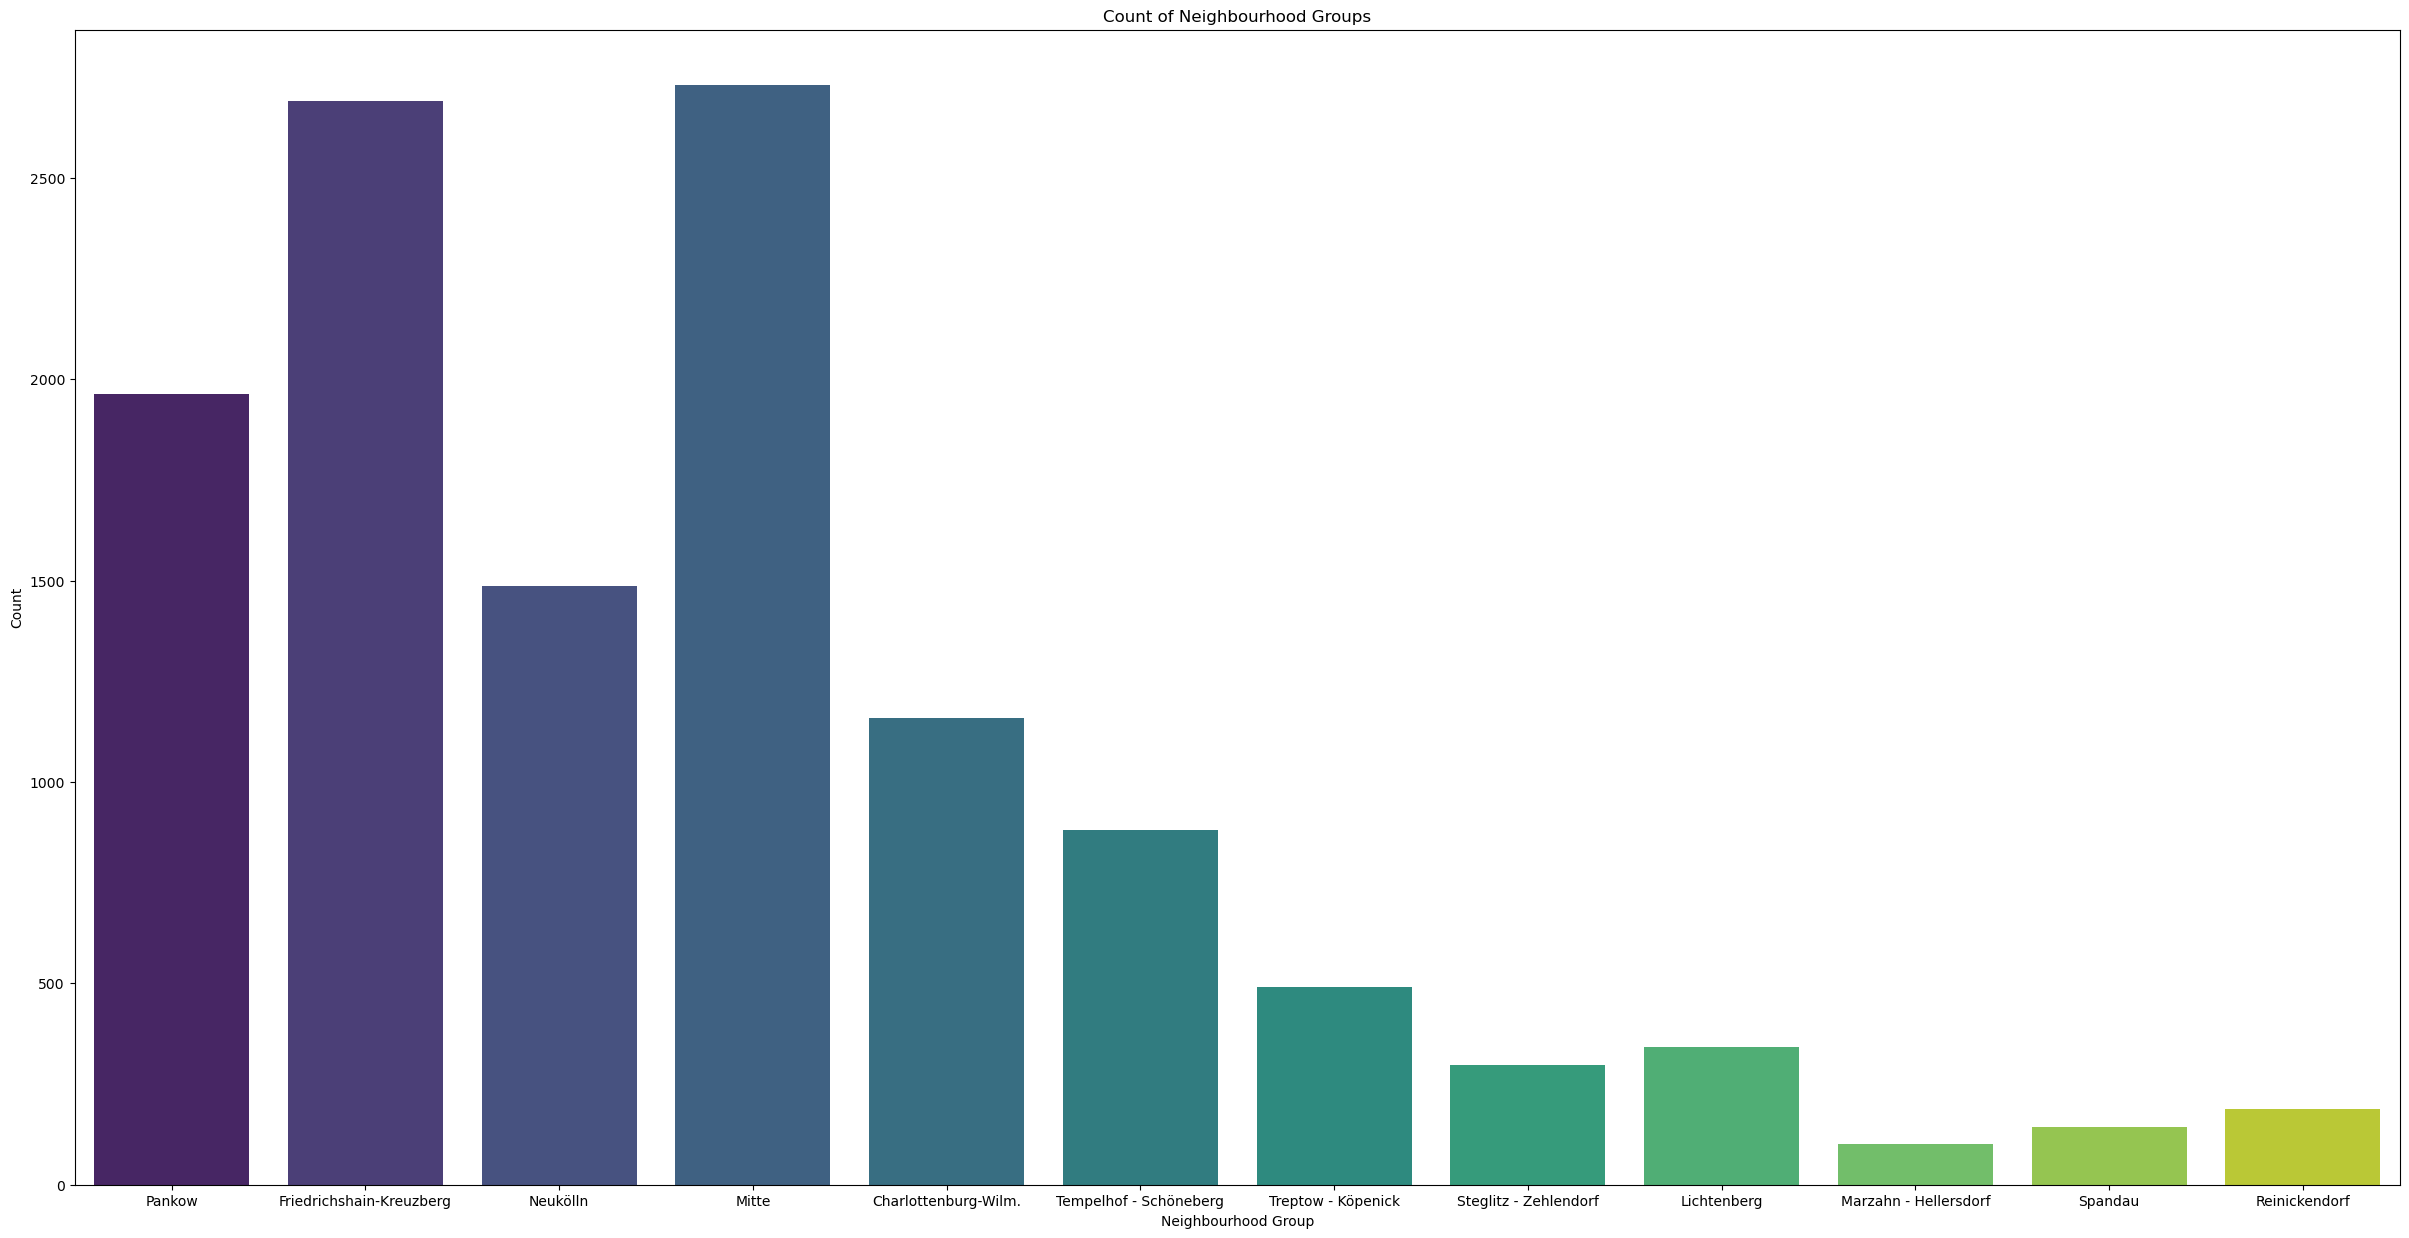

In [15]:
# Plot the count plot with colors
plt.figure(figsize=(30, 15))
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Count of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

## Price Exploration

Let's have a quick summary of the price data. In according to the summary statistics it is clear that the Price ranges from $0-$140. But there also exists price which has a maximum of $9999. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc.
Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

We  also plot a boxplot to understand how the data is spread out for high ranges for the price irrespective of region.

In [16]:
# Let us now take a look at the price range of the properties
df['price'].describe()

count    12472.000000
mean       115.166774
std        195.676946
min          0.000000
25%         50.000000
50%         81.000000
75%        140.000000
max       9999.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

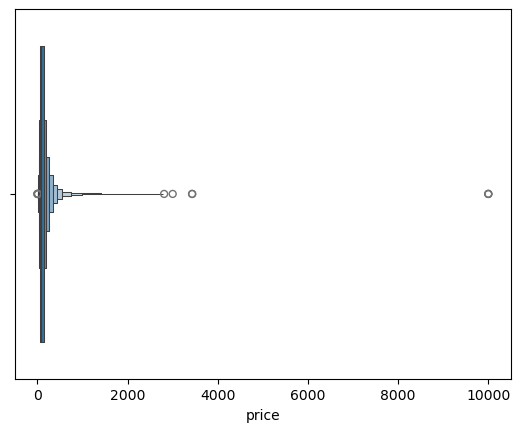

In [17]:
figsize=(12,8)
sns.boxenplot(x='price',data=df)

### Average prices

1. based on the neighbourhood group  : We can see here that the neighbourhood groups Marzahn - Hellersdorf , Mitte have high values for the average price of the properties. While Reinickendorf has the lowest value for average price.

In [18]:
# Ensure 'price' is numeric (it should be if it is int64)
# Group by 'neighbourhood_group' and calculate the mean price with numeric_only=True
mean_price_by_neighbourhood = df.groupby('neighbourhood_group').mean(numeric_only=True)['price']

# Display the result
print(mean_price_by_neighbourhood)


neighbourhood_group
Charlottenburg-Wilm.        116.271786
Friedrichshain-Kreuzberg    110.141211
Lichtenberg                  92.023324
Marzahn - Hellersdorf       377.410000
Mitte                       136.021604
Neukölln                     81.482179
Pankow                      118.385831
Reinickendorf                74.267380
Spandau                     100.729167
Steglitz - Zehlendorf        96.260135
Tempelhof - Schöneberg      117.152100
Treptow - Köpenick          103.659878
Name: price, dtype: float64


2. based on room type : We can see that the private rooms are the cheapest and most affordable in Airbnbs, while renting an entire apartment/home is more expensive also renting a hotel room is extrmely expensive. The price of renting a Private room or shared room is reasonable and hence is preferred by people who are travelling solo or as a couple.

In [19]:
# Grouping based on room type
df.groupby("room_type").mean(numeric_only=True)["price"]

room_type
Entire home/apt    133.452548
Hotel room         227.779412
Private room        74.900223
Shared room        102.703704
Name: price, dtype: float64

| Room Type        | Average Price |
|------------------|---------------|
| Entire home/apt  | 133.45        |
| Hotel room       | 227.78        |
| Private room     | 74.90         |
| Shared room      | 102.70        |



### Average room rent for locality

For any traveller, the most important thing is the price since this sets the budget of his/her trip. So in the below we will figure out what is the average price per night. We will check for different room type and based on neighbourhood group to figure out what is the average per night stay. Staying at a Apartment or hotel room is always an expensive stay than shared room/private rooms for any location. This is so because Entire room is rented out by family for nice stay where privacy is also one of the major factor and hotel room is rented by a member who need service and privacy . Whereas Stay at Shared rooms are being preferred by travellers who generally don't wish to stay for long time at a particular place and moves around places quickly.

So looking at the plot it is clear :

a. Shared room at Neukölln is the most cheapest stay per night whereas Renting a shared room at Steglitz - Zehlendorf per night is the most expensive.

b. Average price for Private room in  Steglitz - Zehlendorf is more cheaper than shared room in the same city.  

c. Though Shared room at Neukölln is the cheapest whereas Apartment renting is not Neukölln. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together , let me know what you think :).

We will also list out the average price for each type of room per neighbourhood so that tourists can plan based on the budget.


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,0.87,1,80,1,First name and Last name: Nicolas Krotz Conta...
1,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,0.08,1,52,0,03/Z/RA/003410-18
2,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,55531,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,93,26,0.16,4,215,0,Legal entity name and Legal form: DA Downtown ...
3,Condo in Berlin · ★4.72 · 1 bedroom · 3 beds ·...,64696,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,92,93,48,0.30,2,113,0,Legal entity name and Legal form: DA Downtown ...
4,Rental unit in Berlin · ★4.77 · Studio · 1 bed...,68997,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,25,92,299,1.84,1,41,1,Legal entity name and Legal form: DA Downtown ...


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='room_type,neighbourhood_group'>

Text(0.5, 1.0, 'Average Price for rooms in neighbourhood group')

Text(0, 0.5, 'Average Daily Price')

Text(0.5, 0, 'Neighbourhood Group')

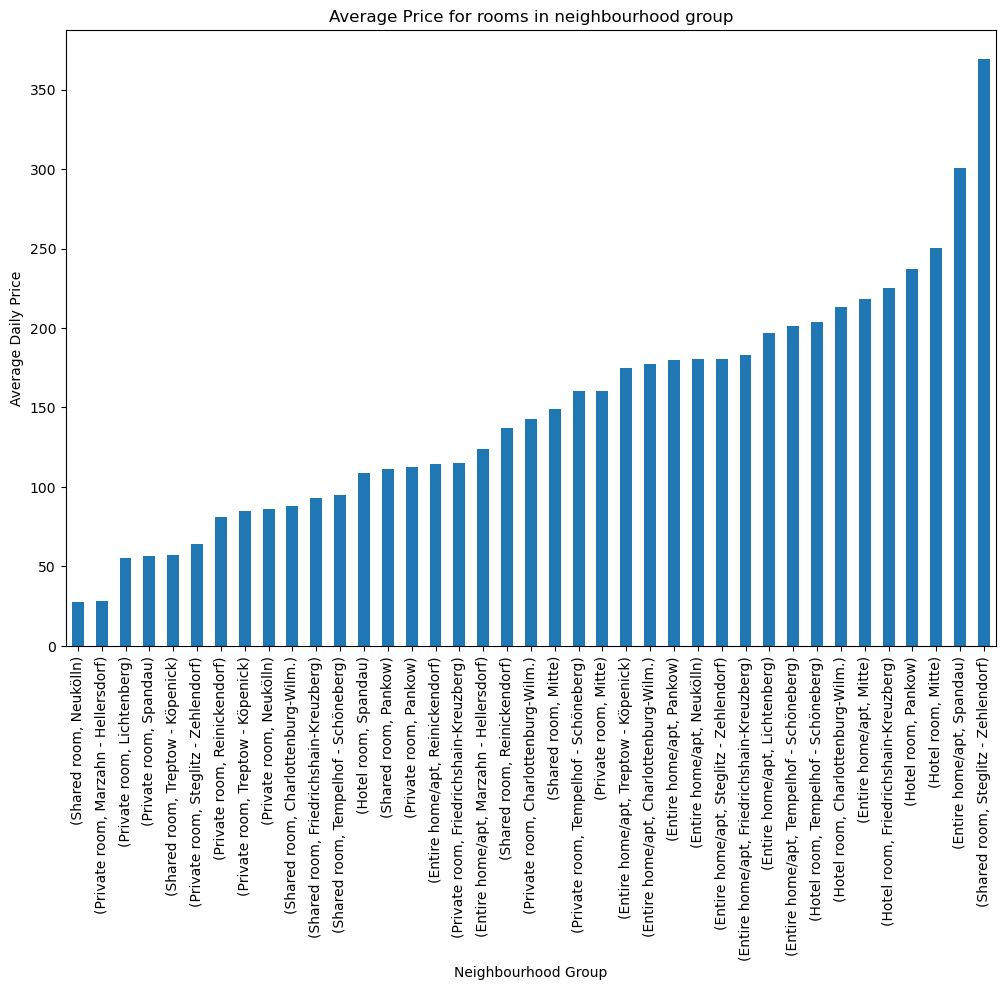

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group                 
Entire home/apt Lichtenberg               196.642857
                Marzahn - Hellersdorf     123.800000
                Tempelhof - Schöneberg    201.114943
                Reinickendorf             114.300000
                Friedrichshain-Kreuzberg  182.733010
                Mitte                     217.962264
                Spandau                   300.727273
                Charlottenburg-Wilm.      177.447619
                Pankow                    179.833333
                Neukölln                  180.217391
                Steglitz - Zehlendorf     180.416667
                Treptow - Köpenick        174.568182
Hotel room      Tempelhof - Schöneberg    203.590909
                Friedrichshain-Kreuzberg  225.400000
                Spandau                   109.000000
                Charlottenburg-Wilm.      213.000000
                Mitte                     250.272727
                Pankow                    237.058824
Private room    Mitte                     160.318750
                Tempelhof - Schöneberg    160.275862
                Charlottenburg-Wilm.      142.760684
                Neukölln                   86.162162
                Treptow - Köpenick         84.600000
                Reinickendorf              81.363636
                Steglitz - Zehlendorf      64.176471
                Spandau                    56.416667
                Lichtenberg                55.375000
                Marzahn - Hellersdorf      28.000000
                Friedrichshain-Kreuzberg  115.311111
                Pankow                    112.528736
Shared room     Neukölln                   27.416667
                Reinickendorf             137.000000
                Pankow                    111.000000
                Tempelhof - Schöneberg     95.000000
                Friedrichshain-Kreuzberg   92.812500
                Charlottenburg-Wilm.       87.750000
                Treptow - Köpenick         57.500000
                Mitte                     148.764706
                Steglitz - Zehlendorf     369.000000

In [20]:
df.head()
plt.figure(figsize=(12,8))
dfx = df[df['minimum_nights']==1]
df1 = dfx.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')



### Expensive Neighbourhood

Till so far we have checked on the location group, but we have not came across each neighbourhood. This is very much important in terms of price to understand which locality has the highest price margin in terms of night being spend by traveller. Let's dig further to understand further.

So we will now plot the most expensive neighbourhood, and we will plot only Top 15 neighbourhood and Bottom 15 with respect to average price. This will help a traveller to choose the appropriate neighbourhood based on his budget.

So according to the below plot Brunsbütteler Damm is the most expensive in terms of neighbourhood. Whereas Marzahn-Mitte is the least expensive to stay.


In [21]:
print(dfx.dtypes)


name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


Top 20 most expensive locality in Airbnb listing are :


<Axes: xlabel='neighbourhood'>

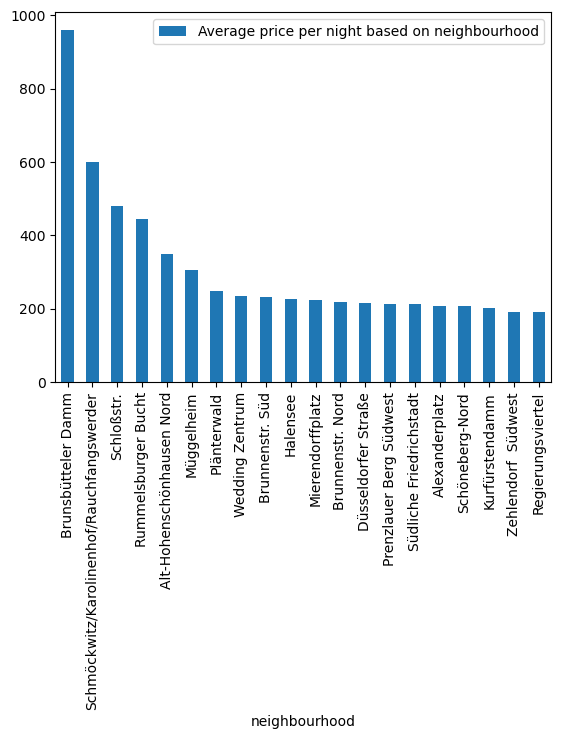

,Average price per night based on neighbourhood
neighbourhood,
Brunsbütteler Damm,960.000000
Schmöckwitz/Karolinenhof/Rauchfangswerder,599.250000
Schloßstr.,479.000000
Rummelsburger Bucht,445.250000
Alt-Hohenschönhausen Nord,349.333333
Müggelheim,303.750000
Plänterwald,247.000000
Wedding Zentrum,235.307692
Brunnenstr. Süd,230.312500


In [22]:
print('Top 20 most expensive locality in Airbnb listing are :')

df4 = dfx.dropna(subset=["price"]).groupby("neighbourhood")[["price"]].mean().sort_values(by="price", ascending=False).rename(columns={"price": "Average price per night based on neighbourhood"}).head(20)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


<Axes: xlabel='neighbourhood'>

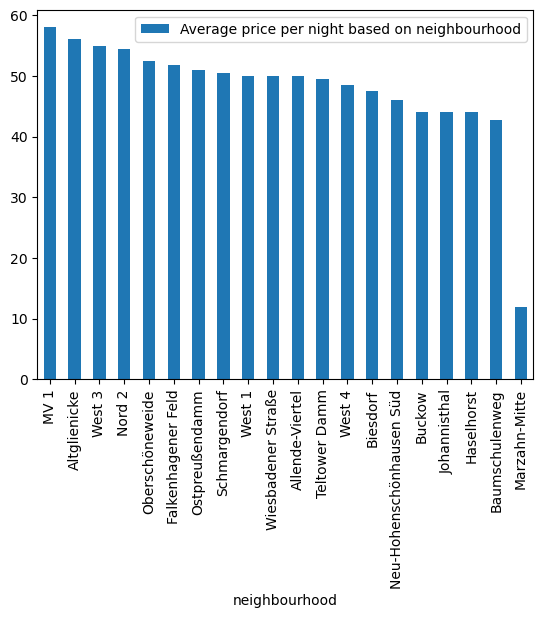

,Average price per night based on neighbourhood
neighbourhood,
MV 1,58.000000
Altglienicke,56.000000
West 3,55.000000
Nord 2,54.500000
Oberschöneweide,52.400000
Falkenhagener Feld,51.750000
Ostpreußendamm,51.000000
Schmargendorf,50.500000
West 1,50.000000


In [23]:
#print('Least expensive neighbourhood according to Airbnb listing are')

df4 = dfx.dropna(subset=["price"]).groupby("neighbourhood")[["price"]].mean().sort_values(by="price", ascending=False).rename(columns={"price": "Average price per night based on neighbourhood"}).tail(20)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

## Plot Price based on the Availability 365

We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='availability_365', ylabel='price'>

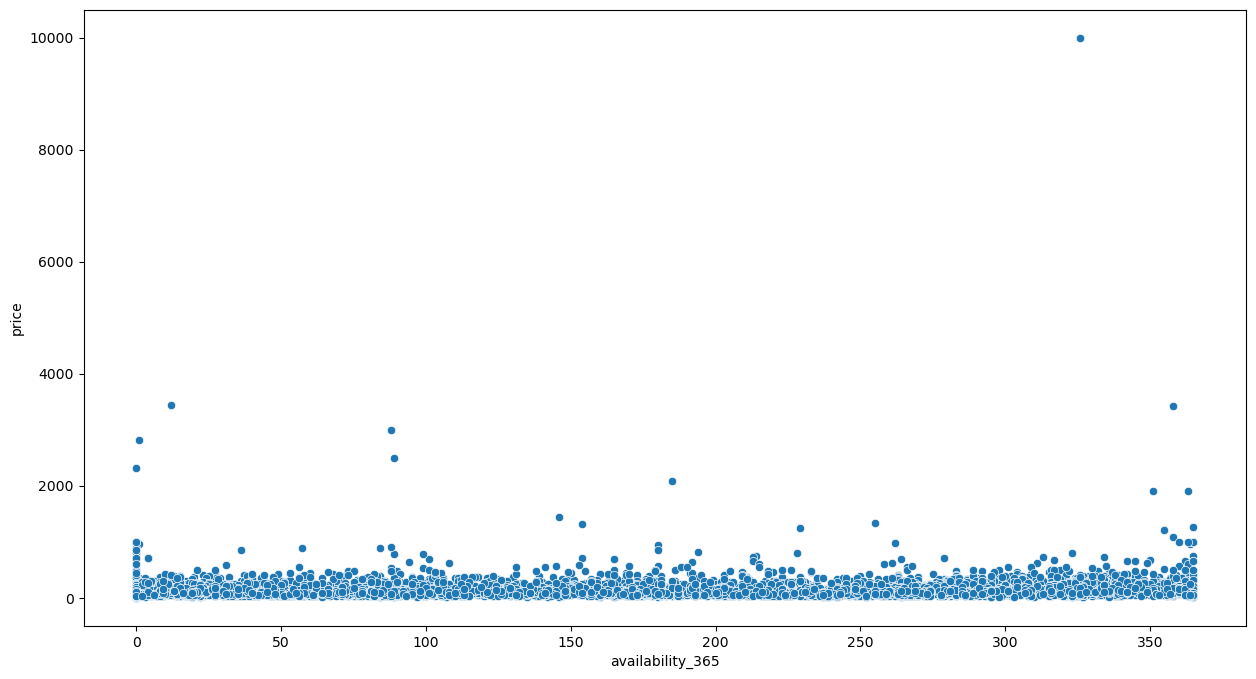

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

# Min and maximum no of listings a host has on Airbnb

In [25]:
# No of listings a particular host has
print("Minimum number of listings a particular host has:", df['calculated_host_listings_count'].min())
print("Maximum number of listings a particular host has:", df['calculated_host_listings_count'].max())


Minimum number of listings a particular host has: 1
Maximum number of listings a particular host has: 172


In [26]:
# Let us take a look at the number of listings a host has on Airbnb
df['calculated_host_listings_count'].unique()

array([  1,   4,   2,   3,   8,   6,  15,   5,   7,  49,   9,  13,  10,
        11,  39,  33,  23,  14,  18,  21,  12,  29,  17,  19,  44,  20,
        25,  50,  38, 172,  52,  56,  84,  47])

### Visualizing the percentage of listings most host have
From figure below, we can see that majority of the hosts have 1 properties listed on Airbnb, while few have 2 or 3 properties listed.

<Figure size 5000x5000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x768d8db7d9a0>,
 [Text(-0.4086338479422915, 1.021282712237839, '1'),
  Text(-0.506092873397323, -0.9766626866510472, '4'),
  Text(-0.014961830546004416, -1.0998982423964105, '2'),
  Text(0.2185384543297912, -1.0780727915957928, '3'),
  Text(0.37732135612246254, -1.0332611452163998, '8'),
  Text(0.5080600768217169, -0.9756407937042769, '6'),
  Text(0.6208834454449931, -0.9080218869456587, '15'),
  Text(0.7156141757825824, -0.835401910112142, '5'),
  Text(0.7898695637752193, -0.7655756476152732, '7'),
  Text(0.8482424351793696, -0.7003461795147977, '49'),
  Text(0.8904721529251926, -0.645801319962086, '9'),
  Text(0.9226181448624619, -0.5989789301557691, '13'),
  Text(0.9503571013294373, -0.5539145962625553, '10'),
  Text(0.9743580105434436, -0.5105158834843662, '11'),
  Text(0.9955550433314643, -0.4678356075559947, '39'),
  Text(1.011865993832583, -0.4314246290201797, '33'),
  Text(1.0241394071253298, -0.4014205709389821, '23'),
  Text(1.0351489585546363,

(-1.0999983346468964,
 1.0999999206974713,
 -1.099999973329827,
 1.099999440662476)

Text(0.5, 1.0, 'Listings a host has on Airbnb')

<Figure size 5000x5000 with 0 Axes>

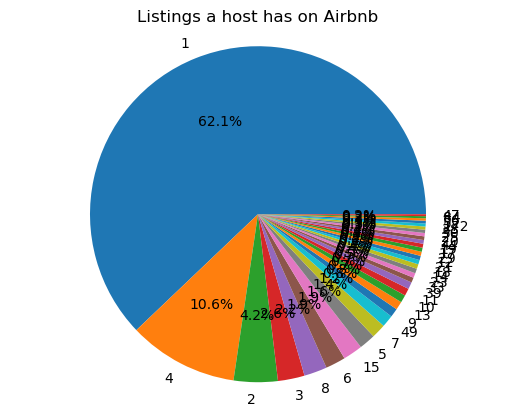

In [27]:
# Visualizing the percentage of listings most host have
labels = df['calculated_host_listings_count'].unique()
sizes = df['calculated_host_listings_count'].value_counts()*100

plt.figure(figsize = (50,50))
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Listings a host has on Airbnb')


plt.show()

### Location and Review Score

Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. So we will try to figure out the review , how each neighbourhood is doing in respect to review. Since there is a limited data with review we will try to figure out as much as we can.

First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

So according to the below plot, Mitte got most review in comparison to Spandau and that is an interesting find.

<Axes: xlabel='neighbourhood_group'>

Text(0.5, 1.0, 'Location and Review Score(Min of 50)')

Text(0, 0.5, 'Number of Review')

Text(0.5, 0, 'Neighbourhood Group')

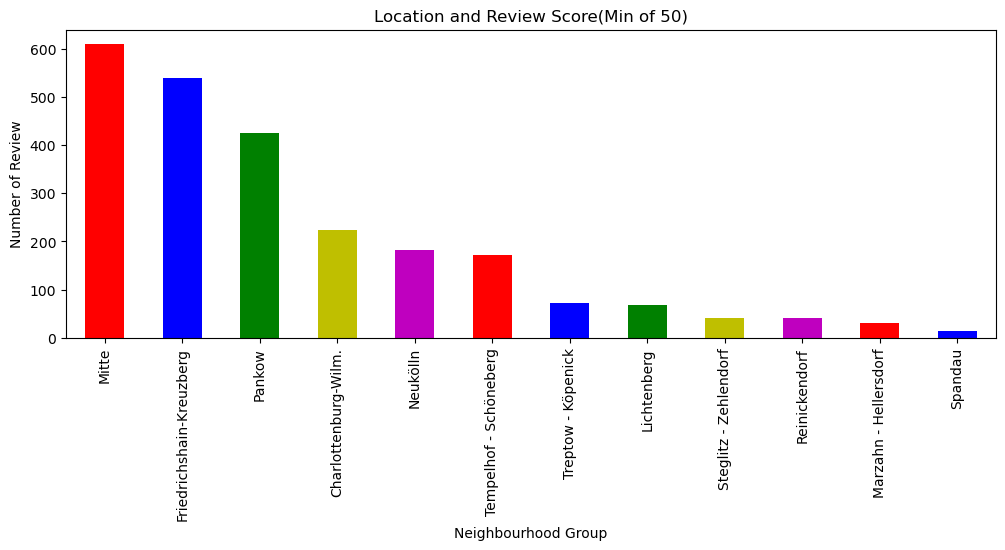

 Count of Review v/s neighbourhood group


,count
neighbourhood_group,
Mitte,609
Friedrichshain-Kreuzberg,540
Pankow,424
Charlottenburg-Wilm.,224
Neukölln,183
Tempelhof - Schöneberg,172
Treptow - Köpenick,73
Lichtenberg,67
Steglitz - Zehlendorf,41


In [28]:
fig = plt.figure(figsize=(12,4))

review_50 = df[df['number_of_reviews']>=50]

df2 = review_50['neighbourhood_group'].value_counts()

df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

### Working on the 2nd dataset to apply analysis on prices

In [113]:
df_To_Analys.isna().sum()

name                                            0
host_id                                         0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


In [114]:
# Assuming df_To_Analys is the DataFrame you are working with
for col in df_To_Analys.columns:
    if df_To_Analys[col].isna().sum() > 750:
        if df_To_Analys[col].dtype == 'object':
            mode_value = df_To_Analys[col].mode()[0]  # Mode for object columns
            df_To_Analys[col].fillna(mode_value, inplace=True)
        else:
            mean_value = df_To_Analys[col].mean()  # Mean for numeric columns
            df_To_Analys[col].fillna(mean_value, inplace=True)
    else:
        if df_To_Analys[col].dtype == 'object':
            mode_value = df_To_Analys[col].mode()[0]
            df_To_Analys[col].fillna(mode_value, inplace=True)
        else:
            mean_value = df_To_Analys[col].mean()
            df_To_Analys[col].fillna(mean_value, inplace=True)

/tmp/ipykernel_484447/463649042.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_To_Analys[col].fillna(mode_value, inplace=True)
/tmp/ipykernel_484447/463649042.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [115]:
df_To_Analys.isna().sum()

name                                            0
host_id                                         0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


In [117]:
import statsmodels.api as sm

# Convert price to numeric by removing any non-numeric characters
df_To_Analys['price'] = df_To_Analys['price'].replace('[\$,]', '', regex=True).astype(float)
# Prepare the independent variables (reviews_per_month and review_scores_rating)
X = df_To_Analys[['reviews_per_month', 'review_scores_rating']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Prepare the dependent variable (price)
y = df_To_Analys['price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.821
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           0.000403
Time:                        16:52:37   Log-Likelihood:                -97472.
No. Observations:               13134   AIC:                         1.949e+05
Df Residuals:                   13131   BIC:                         1.950e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  173.7047     30.456      5.703      0.000     114.006     233.403
reviews_per_month        7.5929      2.159      3.518      0.000       3.362      11.824
review_scores_rating   -12.9256      6.461     -2.000      0.045     -25.591      -0.261
==============================================================================
Omnibus:                    42576.166   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5937173117.368
Skew:                          54.424   Prob(JB):                         0.00
Kurtosis:                    3294.999   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Impact of Reviews per Month:** 
There is a positive and significant relationship between the number of reviews per month and listing prices. Each additional review per month increases the price by approximately $7.59.

## **Impact of Review Scores Rating:**
Unexpectedly, there is a negative and significant relationship between review scores and listing prices. Each unit increase in review score decreases the price by approximately $12.93, suggesting a complex relationship that needs further investigation.




<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='last_review', ylabel='price'>

Text(0.5, 1.0, 'Price Trend Over Time')

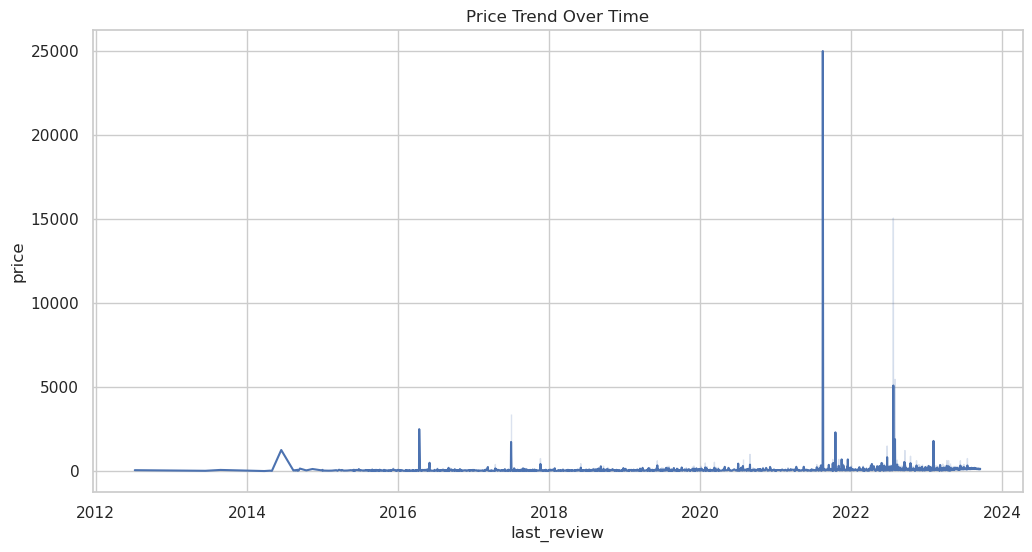

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='month'>

Text(0.5, 1.0, 'Average Price by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Price')

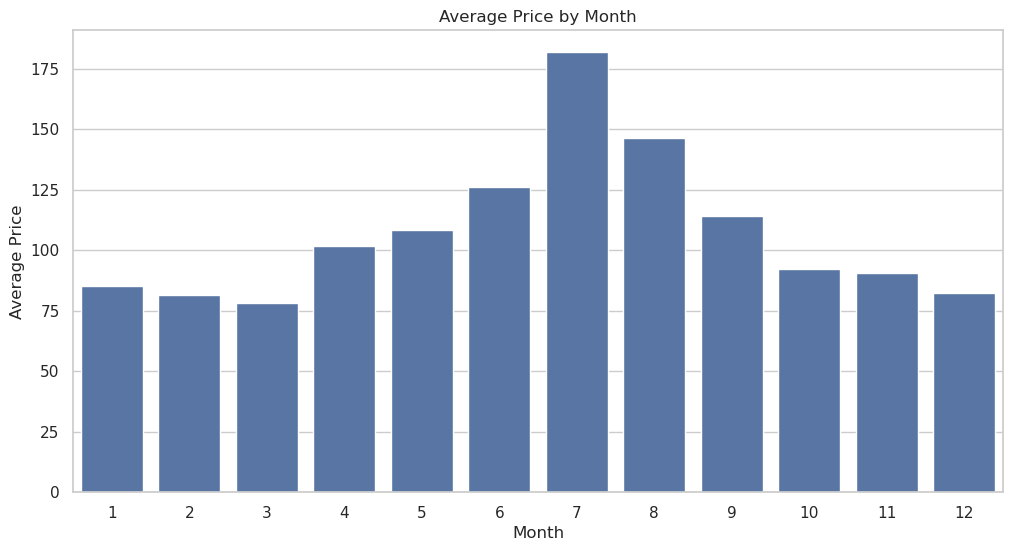

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='event', ylabel='price'>

Text(0.5, 1.0, 'Price Analysis During Events')

Text(0.5, 0, 'Event')

Text(0, 0.5, 'Price')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'None'),
  Text(1, 0, 'New Year'),
  Text(2, 0, 'Christmas'),
  Text(3, 0, 'Berlin Film Festival'),
  Text(4, 0, 'Oktoberfest'),
  Text(5, 0, 'Easter')])

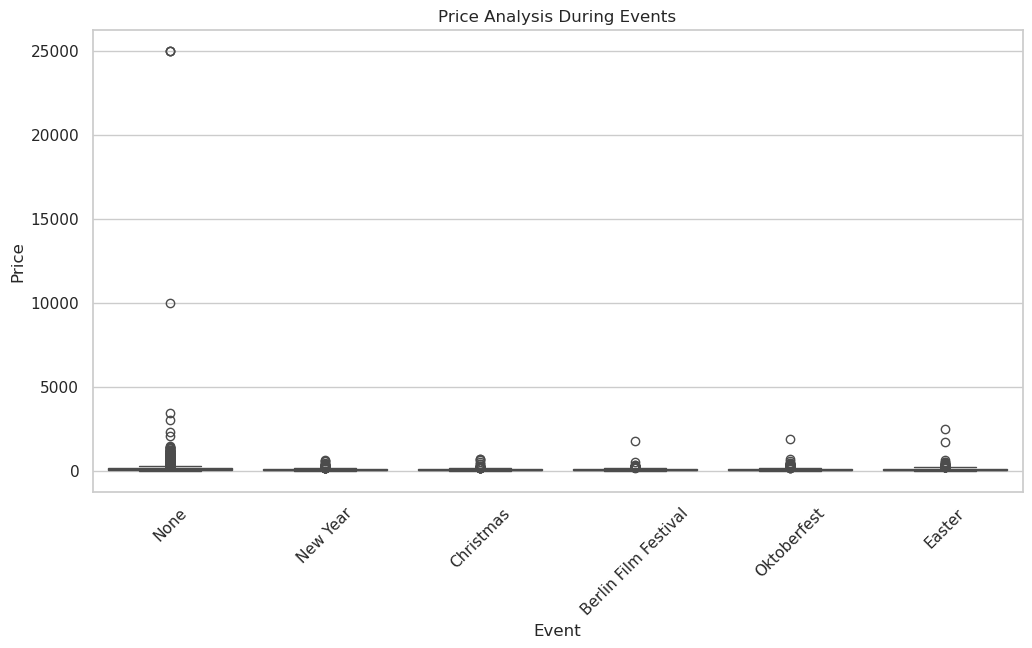

In [119]:
# Check for missing values
df_To_Analys.dropna(subset=['price', 'last_review'], inplace=True)
 
# Data Preparation
df_To_Analys['last_review'] = pd.to_datetime(df_To_Analys['last_review'])
df_To_Analys['price'] = df_To_Analys['price'].replace('[\$,]', '', regex=True).astype(float)
df_To_Analys['month'] = df_To_Analys['last_review'].dt.month
df_To_Analys['year'] = df_To_Analys['last_review'].dt.year
df_To_Analys['day_of_week'] = df_To_Analys['last_review'].dt.dayofweek
 
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_To_Analys, x='last_review', y='price')
plt.title('Price Trend Over Time')
plt.show()
 
# Average price by month
monthly_avg = df_To_Analys.groupby('month')['price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()
 
# Seasonal Events Analysis
events = {
    'Christmas': (12, 20, 12, 31),
    'New Year': (1, 1, 1, 7),
    'Berlin Film Festival': (2, 10, 2, 20),  # Example dates
    'Easter': (4, 1, 4, 15),  # Example range
    'Oktoberfest': (9, 15, 10, 10)  # Example range
}
 
# Add event column
df_To_Analys['event'] = 'None'
for event, (start_month, start_day, end_month, end_day) in events.items():
    event_start = (df_To_Analys['month'] == start_month) & (df_To_Analys['last_review'].dt.day >= start_day)
    event_end = (df_To_Analys['month'] == end_month) & (df_To_Analys['last_review'].dt.day <= end_day)
    df_To_Analys.loc[event_start | event_end, 'event'] = event
 
# Plot prices during events
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_To_Analys, x='event', y='price')
plt.title('Price Analysis During Events')
plt.xlabel('Event')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
 

# Encoding Categorical Variables
We’ll use one-hot encoding for categorical variables such as neighbourhood_group, neighbourhood, and room_type. For simplicity, we can ignore name and host_name since they may not significantly impact the prediction model.

In [29]:
# Drop columns that won't aid in prediction
df = df.drop(columns=['name', 'host_id', 'license'])

# Fill missing values for 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)


/tmp/ipykernel_484447/1831816700.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


# Feature Selection
separate the target variable (price) from the features.

In [30]:
# Separate the features (X) and the target (y)
X = df.drop(columns=['price'])
y = df['price']


# Implementation of Models
Extra Trees Classifier, Gaussian Naive Bayes, Decision Tree Regressor, and get mean_absolute_error for each

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)
print(f'Mean Absolute Error for Extra Trees: {mean_absolute_error(y_test, et_pred)}')

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
print(f'Mean Absolute Error for GNB: {mean_absolute_error(y_test, gnb_pred)}')

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Mean Absolute Error for Decision Tree: {mean_absolute_error(y_test, dt_pred)}')


ExtraTreesRegressor(random_state=42)

Mean Absolute Error for Extra Trees: 43.42529325317302


GaussianNB()

Mean Absolute Error for GNB: 176.76112224448897


DecisionTreeRegressor(random_state=42)

Mean Absolute Error for Decision Tree: 59.16653306613227


# Hyperparameter Tuning for Extra Trees Regressor
tune the models' hyperparameters to improve performance. tuning the Extra Trees Regressor:

In [32]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/_para

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


# Hyperparameter Tuning for Decision Tree Regressor
tune the hyperparameters for the Decision Tree Regressor.

In [33]:
# Decision Tree hyperparameter tuning
dt_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    #'max_depth': [None, 10, 20, 30, 40],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=dt_param_grid,
                              cv=5,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print(f'Best parameters for Decision Tree: {dt_grid_search.best_params_}')

# Train the Decision Tree with best parameters
best_dt_model = dt_grid_search.best_estimator_
best_dt_pred = best_dt_model.predict(X_test)
print(f'Mean Absolute Error for tuned Decision Tree: {mean_absolute_error(y_test, best_dt_pred)}')


/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_features': None, 'min_samples_leaf': 4, 'splitter': 'random'}
Mean Absolute Error for tuned Decision Tree: 44.717234468937875


# Hyperparameter Tuning for Gaussian Naive Bayes
Gaussian Naive Bayes has fewer hyperparameters to tune. We'll focus on var_smoothing.

In [34]:
# Gaussian Naive Bayes hyperparameter tuning
gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

gnb_grid_search = GridSearchCV(estimator=GaussianNB(),
                               param_grid=gnb_param_grid,
                               cv=5,
                               scoring='neg_mean_absolute_error',
                               n_jobs=-1)
gnb_grid_search.fit(X_train, y_train)
print(f'Best parameters for Gaussian Naive Bayes: {gnb_grid_search.best_params_}')

# Train the Gaussian Naive Bayes with best parameters
best_gnb_model = gnb_grid_search.best_estimator_
best_gnb_pred = best_gnb_model.predict(X_test)
print(f'Mean Absolute Error for tuned Gaussian Naive Bayes: {mean_absolute_error(y_test, best_gnb_pred)}')


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='neg_mean_absolute_error')

Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-06}
Mean Absolute Error for tuned Gaussian Naive Bayes: 156.79599198396792


# Run Models with Best Parameters
Train each model using the best parameters found, make predictions on the test set, and calculate various performance metrics.

# Comparison Table
Create a table to compare the models based on several metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 score.

# Graphical Comparison
Generate two types of graphs for comparison:

Bar Chart for performance metrics.
Residual Plot to visualize the residuals of predictions for each model.

In [35]:
# Define the best parameters
et_best_params = {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
dt_best_params = {'criterion': 'absolute_error', 'max_features': None, 'min_samples_leaf': 4, 'splitter': 'random'}
gnb_best_params = {'var_smoothing': 1e-06}

# Instantiate and train the models
et_model = ExtraTreesRegressor(n_estimators=100, **et_best_params, random_state=42)
dt_model = DecisionTreeRegressor(**dt_best_params, random_state=42)
gnb_model = GaussianNB(var_smoothing=gnb_best_params['var_smoothing'])

et_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)

# Predict on the test set
et_pred = et_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
gnb_pred = gnb_model.predict(X_test)

# Calculate performance metrics
metrics = pd.DataFrame({
    'Model': ['Extra Trees', 'Decision Tree', 'Gaussian Naive Bayes'],
    'Mean Absolute Error': [mean_absolute_error(y_test, et_pred),
                            mean_absolute_error(y_test, dt_pred),
                            mean_absolute_error(y_test, gnb_pred)],
    'Mean Squared Error': [mean_squared_error(y_test, et_pred),
                           mean_squared_error(y_test, dt_pred),
                           mean_squared_error(y_test, gnb_pred)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, et_pred)),
                                np.sqrt(mean_squared_error(y_test, dt_pred)),
                                np.sqrt(mean_squared_error(y_test, gnb_pred))],
    'R^2 Score': [r2_score(y_test, et_pred),
                  r2_score(y_test, dt_pred),
                  r2_score(y_test, gnb_pred)]
})

print(metrics)



ExtraTreesRegressor(max_features='sqrt', random_state=42)

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=4,
                      random_state=42, splitter='random')

GaussianNB(var_smoothing=1e-06)

                  Model  Mean Absolute Error  Mean Squared Error  \
0           Extra Trees            42.819868         9962.118936   
1         Decision Tree            44.717234        10983.399699   
2  Gaussian Naive Bayes           156.795992        47961.575150   

   Root Mean Squared Error  R^2 Score  
0                99.810415   0.263562  
1               104.801716   0.188065  
2               219.001313  -2.545502  


<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Model Performance Comparison')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Score')

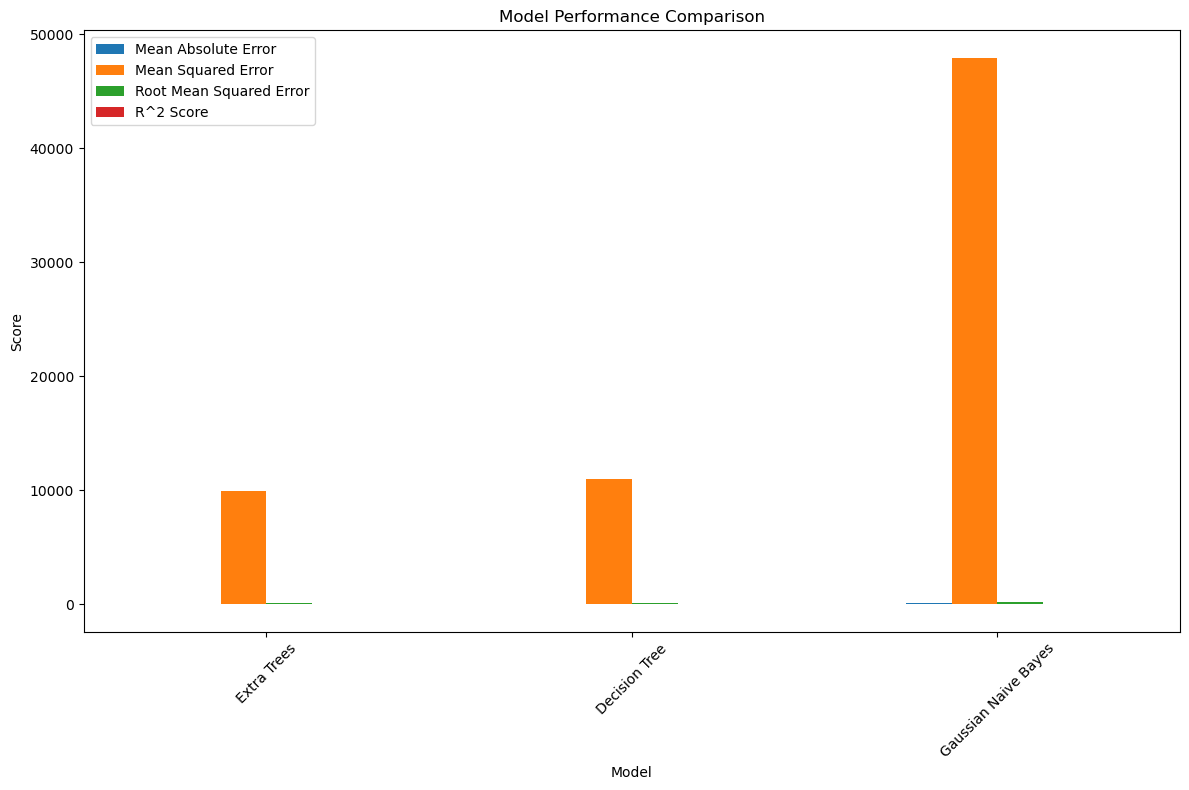

In [36]:
# Bar chart comparison of metrics
metrics.plot(x='Model', kind='bar', figsize=(12, 8), rot=45, legend=True)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Extra Trees Residuals')

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Residuals')

<Axes: >

Text(0.5, 1.0, 'Decision Tree Residuals')

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Residuals')

<Axes: >

Text(0.5, 1.0, 'Gaussian Naive Bayes Residuals')

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Residuals')

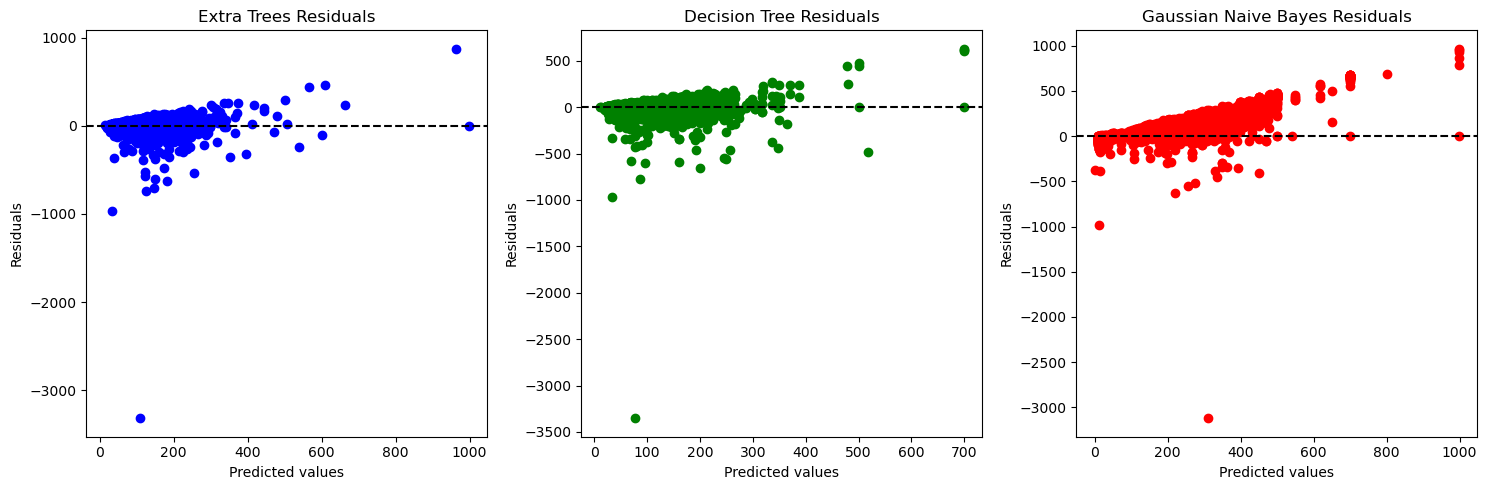

In [37]:
# Residual plots
plt.figure(figsize=(15, 5))

# Extra Trees
plt.subplot(1, 3, 1)
plt.scatter(et_pred, et_pred - y_test, c='blue', marker='o', label='Extra Trees')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Extra Trees Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(dt_pred, dt_pred - y_test, c='green', marker='o', label='Decision Tree')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Decision Tree Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Gaussian Naive Bayes
plt.subplot(1, 3, 3)
plt.scatter(gnb_pred, gnb_pred - y_test, c='red', marker='o', label='Gaussian Naive Bayes')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gaussian Naive Bayes Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()



#### 1. **Mean Absolute Error (MAE)**:
- **Extra Trees**: 42.82
- **Decision Tree**: 44.72
- **Gaussian Naive Bayes**: 156.80

The Extra Trees model has the lowest MAE, indicating that its predictions are, on average, closest to the actual values. The Decision Tree model also performs better than the Gaussian Naive Bayes model, which has a significantly higher MAE, suggesting that Gaussian Naive Bayes is less accurate in predicting the listing prices.

#### 2. **Mean Squared Error (MSE)**:
- **Extra Trees**: 9962.12
- **Decision Tree**: 10983.40
- **Gaussian Naive Bayes**: 47961.58

Extra Trees also has the lowest MSE, indicating fewer large errors compared to the other models. The Decision Tree model has a higher MSE than Extra Trees, and Gaussian Naive Bayes shows the highest MSE, which suggests that it tends to produce more substantial errors in predictions.

#### 3. **Root Mean Squared Error (RMSE)**:
- **Extra Trees**: 99.81
- **Decision Tree**: 104.80
- **Gaussian Naive Bayes**: 219.00

RMSE reflects the model’s prediction accuracy with the same units as the target variable. Extra Trees has the lowest RMSE, implying more precise predictions with fewer large errors compared to Decision Tree and Gaussian Naive Bayes. The Gaussian Naive Bayes model shows a significantly higher RMSE, highlighting that it makes larger errors more frequently.

#### 4. **R^2 Score**:
- **Extra Trees**: 0.2636
- **Decision Tree**: 0.1881
- **Gaussian Naive Bayes**: -2.5455

The R^2 Score measures how well the model explains the variability of the target variable. Extra Trees has the highest R^2 score among the models, though still relatively low, indicating that it explains a small proportion of the variance. The Decision Tree model has a lower R^2 score, suggesting slightly worse explanatory power. The Gaussian Naive Bayes model has a negative R^2 score, which indicates that its predictions are worse than a simple mean-based prediction.

### Graphical Comparison

#### 1. **Bar Chart of Performance Metrics**


- **Extra Trees**: Shows the best performance across all metrics, with the lowest MAE, MSE, and RMSE, and the highest R^2 score.
- **Decision Tree**: Performs better than Gaussian Naive Bayes but not as well as Extra Trees.
- **Gaussian Naive Bayes**: Shows poor performance with high MAE, MSE, and RMSE, and a negative R^2 score, indicating that it does not fit the data well.

#### 2. **Residual Plots**

The residual plots illustrate the distribution of residuals (differences between predicted and actual values) for each model:

- **Extra Trees**: Residuals are more evenly distributed around zero, suggesting that the model’s predictions are close to actual values with fewer large errors.
- **Decision Tree**: Residuals are also distributed around zero but with a wider spread compared to Extra Trees, indicating less precise predictions.
- **Gaussian Naive Bayes**: Residuals are widely spread and do not center around zero, showing that the model makes substantial prediction errors.

The Extra Trees model is the most effective for predicting Airbnb listing prices based on the provided metrics. It shows the best performance in terms of MAE, MSE, RMSE, and R^2 score. The Decision Tree model performs reasonably well but is less accurate than Extra Trees. The Gaussian Naive Bayes model performs poorly in comparison, making it the least suitable model for this task.

# Nagham Rizk


### 1. **Model Implementation**

   - **Regression Models:**
     - **Linear Regression:** Fit the model using default parameters.
     - **Generalized Linear Model (Poisson Regressor):** Implement the Poisson regression model with default settings.
     - **Ridge Regression:** Apply Ridge Regression with default hyperparameters.
     - **Lasso Regression:** Implement Lasso Regression with default parameters.

   - **Ensemble Models:**
     - **Random Forest Regressor:** Train the Random Forest model with default settings.
     - **Gradient Boosting Regressor:** Fit the Gradient Boosting model using default hyperparameters.
     - **XGBoost Regressor:** Apply XGBoost with default settings.
     - **AdaBoost Regressor:** Implement the AdaBoost model with default parameters.

### 2. **Hyperparameter Tuning**

   - **Linear Regression Models:**
     - **Linear Regression:** Tune hyperparameters such as `fit_intercept` and `copy_X`.
     - **Generalized Linear Model (Poisson Regressor):** Explore different `alpha` values.
     - **Ridge Regression:** Adjust `alpha` and `fit_intercept`.
     - **Lasso Regression:** Tune `alpha` and `fit_intercept`.

   - **Ensemble Models:**
     - **Random Forest Regressor:** Optimize `n_estimators`, `max_features`, and `max_depth`.
     - **Gradient Boosting Regressor:** Tune `learning_rate`, `n_estimators`, and `max_depth`.
     - **XGBoost Regressor:** Adjust `learning_rate`, `n_estimators`, and `max_depth`.
     - **AdaBoost Regressor:** Optimize `learning_rate` and `n_estimators`.

### 3. **Model Evaluation**

   - **Pre-Tuning Evaluation:**
     - Evaluate each model using default parameters.
     - Record metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R².

   - **Post-Tuning Evaluation:**
     - Assess each model with the best hyperparameters identified during tuning.
     - Compare the performance metrics with those obtained before tuning.

   - **Comparison and Analysis:**
     - Create visualizations to compare the performance of different models.
     - Analyze the impact of hyperparameter tuning on model performance.


In [38]:
#Regression Models

# LinearRegression
RL_model = LinearRegression()
RL_model.fit(X_train, y_train)
yRL_pred = RL_model.predict(X_test)

# Generalized Linear Model

glm_model = PoissonRegressor()
glm_model.fit(X_train, y_train)
yglm_pred = glm_model.predict(X_test)

# Ridge Regression

ridge_model =Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
yridge_pred = ridge_model.predict(X_test)

# Lasso Regression

lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
ylasso_pred = lasso_model.predict(X_test)

LinearRegression()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


PoissonRegressor()

Ridge(random_state=42)

Lasso(random_state=42)

In [39]:
print(f'LinearRegression MAE : {mean_absolute_error(y_test, yRL_pred)}')
print(f"Linear Regression RMSE: {mean_squared_error(y_test, yRL_pred, squared=False)}")
print(f"Linear Regression R²: {r2_score(y_test, yRL_pred)}\n")

print(f"Generalized Linear Model MAE: {mean_absolute_error(y_test, yglm_pred)}")
print(f"Generalized Linear Model RMSE: {mean_squared_error(y_test, yglm_pred, squared=False)}")
print(f"Generalized Linear Model R²: {r2_score(y_test, yglm_pred)}\n")

print(f"Ridge Regression MAE: {mean_absolute_error(y_test, yridge_pred)}")
print(f"Ridge Regression RMSE: {mean_squared_error(y_test, yridge_pred, squared=False)}")
print(f"Ridge Regression R²: {r2_score(y_test, yridge_pred)}\n")

print(f"Lasso Regression MAE: {mean_absolute_error(y_test, ylasso_pred)}")
print(f"Lasso Regression RMSE: {mean_squared_error(y_test, ylasso_pred, squared=False)}")
print(f"Lasso Regression R²: {r2_score(y_test,  ylasso_pred)}\n")

LinearRegression MAE : 52.84970012119265
Linear Regression RMSE: 124.09351271729327
Linear Regression R²: -0.13836739533267517

Generalized Linear Model MAE: 51.595970311292525
Generalized Linear Model RMSE: 106.71824630770712
Generalized Linear Model R²: 0.15809778614074188

Ridge Regression MAE: 52.84555983842807
Ridge Regression RMSE: 121.15805951653059
Ridge Regression R²: -0.08514783861765163

Lasso Regression MAE: 54.329994027981726
Lasso Regression RMSE: 115.20905739661376
Lasso Regression R²: 0.018800002355672363



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_me

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_me

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Mean Absolute Error (MAE)')

Text(0, 0.5, 'MAE')

(0.0, 64.32999402798173)

Text(0, 53.84970012119265, '52.85')

Text(1, 52.595970311292525, '51.60')

Text(2, 53.84555983842807, '52.85')

Text(3, 55.329994027981726, '54.33')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Root Mean Squared Error (RMSE)')

Text(0, 0.5, 'RMSE')

(0.0, 134.09351271729327)

Text(0, 125.09351271729327, '124.09')

Text(1, 107.71824630770712, '106.72')

Text(2, 122.15805951653059, '121.16')

Text(3, 116.20905739661376, '115.21')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'R² Score')

Text(0, 0.5, 'R²')

(-0.6383673953326752, 0.25809778614074186)

Text(0, -0.11836739533267517, '-0.14')

Text(1, 0.17809778614074187, '0.16')

Text(2, -0.06514783861765162, '-0.09')

Text(3, 0.03880000235567237, '0.02')

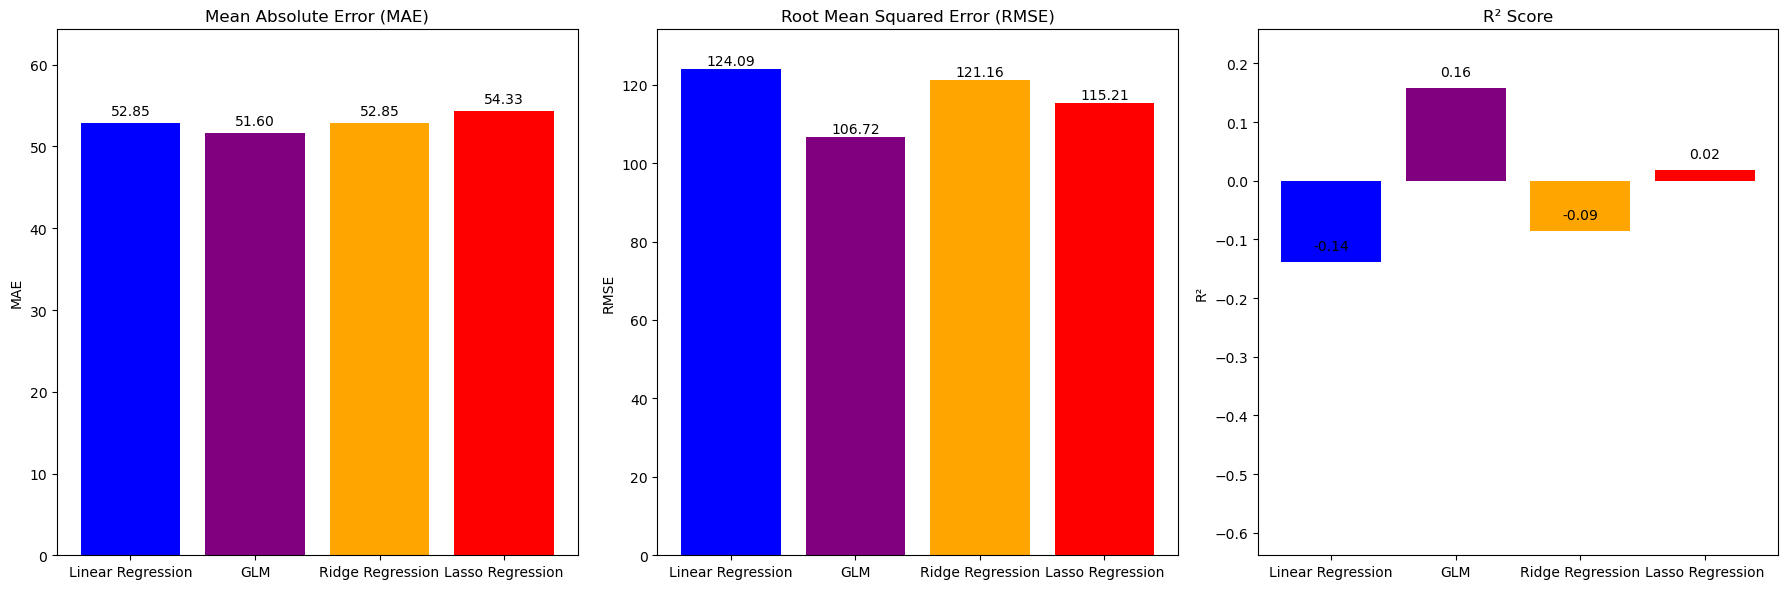

In [40]:
# Metrics
rlmodels = ['Linear Regression', 'GLM', 'Ridge Regression', 'Lasso Regression']
mae_values = [mean_absolute_error(y_test, yRL_pred), 
              mean_absolute_error(y_test, yglm_pred), 
              mean_absolute_error(y_test, yridge_pred), 
              mean_absolute_error(y_test, ylasso_pred)]
rmse_values = [mean_squared_error(y_test, yRL_pred, squared=False), 
               mean_squared_error(y_test, yglm_pred, squared=False), 
               mean_squared_error(y_test, yridge_pred, squared=False), 
               mean_squared_error(y_test, ylasso_pred, squared=False)]
r2_values = [r2_score(y_test, yRL_pred), 
             r2_score(y_test, yglm_pred), 
             r2_score(y_test, yridge_pred), 
             r2_score(y_test, ylasso_pred)]

# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# MAE plot
ax[0].bar(rlmodels, mae_values, color=['blue', 'purple', 'orange', 'red'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, max(mae_values) + 10)
for i, v in enumerate(mae_values):
    ax[0].text(i, v + 1, f"{v:.2f}", ha='center')

# RMSE plot
ax[1].bar(rlmodels, rmse_values, color=['blue', 'purple', 'orange', 'red'])
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, max(rmse_values) + 10)
for i, v in enumerate(rmse_values):
    ax[1].text(i, v + 1, f"{v:.2f}", ha='center')

# R² plot
ax[2].bar(rlmodels, r2_values, color=['blue', 'purple', 'orange', 'red'])
ax[2].set_title('R² Score')
ax[2].set_ylabel('R²')
ax[2].set_ylim(min(r2_values) - 0.5, max(r2_values) + 0.1)
for i, v in enumerate(r2_values):
    ax[2].text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [41]:
##Ensamble models

# Random Forest
rf_model =RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
yrf_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
ygb_pred = gb_model.predict(X_test)

# XGBoost

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
yxgb_pred = xgb_model.predict(X_test)

# AdaBoost
ab_model = AdaBoostRegressor(random_state=42)
ab_model.fit(X_train, y_train)
yab_pred = ab_model.predict(X_test)


RandomForestRegressor(random_state=42)

GradientBoostingRegressor(random_state=42)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

AdaBoostRegressor(random_state=42)

In [42]:
print(f"Random Forest MAE: {mean_absolute_error(y_test, yrf_pred)}")
print(f"Random Forest RMSE: {mean_squared_error(y_test, yrf_pred, squared=False)}")
print(f"Random Forest R²: {r2_score(y_test,  yrf_pred)}\n")

print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, ygb_pred)}")
print(f"Gradient Boosting RMSE: {mean_squared_error(y_test, ygb_pred, squared=False)}")
print(f"Gradient Boosting R²: {r2_score(y_test,  ygb_pred)}\n")


print(f"XGBoost MAE: {mean_absolute_error(y_test,yxgb_pred)}")
print(f"XGBoost Boosting RMSE: {mean_squared_error(y_test, yxgb_pred, squared=False)}")
print(f"XGBoost Boosting R²: {r2_score(y_test,  yxgb_pred)}\n")


print(f"AdaBoost MAE: {mean_absolute_error(y_test, yab_pred)}")
print(f"AdaBoost Boosting RMSE: {mean_squared_error(y_test, yab_pred, squared=False)}")
print(f"AdaBoost Boosting R²: {r2_score(y_test,  yab_pred)}\n")

Random Forest MAE: 43.93690673728409
Random Forest RMSE: 106.99770959628796
Random Forest R²: 0.15368263063353138

Gradient Boosting MAE: 46.658613775298605
Gradient Boosting RMSE: 102.3264180910652
Gradient Boosting R²: 0.2259663600375409

XGBoost MAE: 44.70889919119512
XGBoost Boosting RMSE: 100.40013492981012
XGBoost Boosting R²: 0.2548342509871916

AdaBoost MAE: 55.65709005230468
AdaBoost Boosting RMSE: 107.85804805522015
AdaBoost Boosting R²: 0.14001791415385056



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_me

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_me

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Mean Absolute Error (MAE)')

Text(0, 0.5, 'MAE')

Text(0, 44.43690673728409, '43.94')

Text(1, 47.158613775298605, '46.66')

Text(2, 45.20889919119512, '44.71')

Text(3, 56.15709005230468, '55.66')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Root Mean Squared Error (RMSE)')

Text(0, 0.5, 'RMSE')

Text(0, 107.49770959628796, '107.00')

Text(1, 102.8264180910652, '102.33')

Text(2, 100.90013492981012, '100.40')

Text(3, 108.35804805522015, '107.86')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'R² Score')

Text(0, 0.5, 'R²')

Text(0, 0.20368263063353137, '0.15')

Text(1, 0.2759663600375409, '0.23')

Text(2, 0.3048342509871916, '0.25')

Text(3, 0.19001791415385055, '0.14')

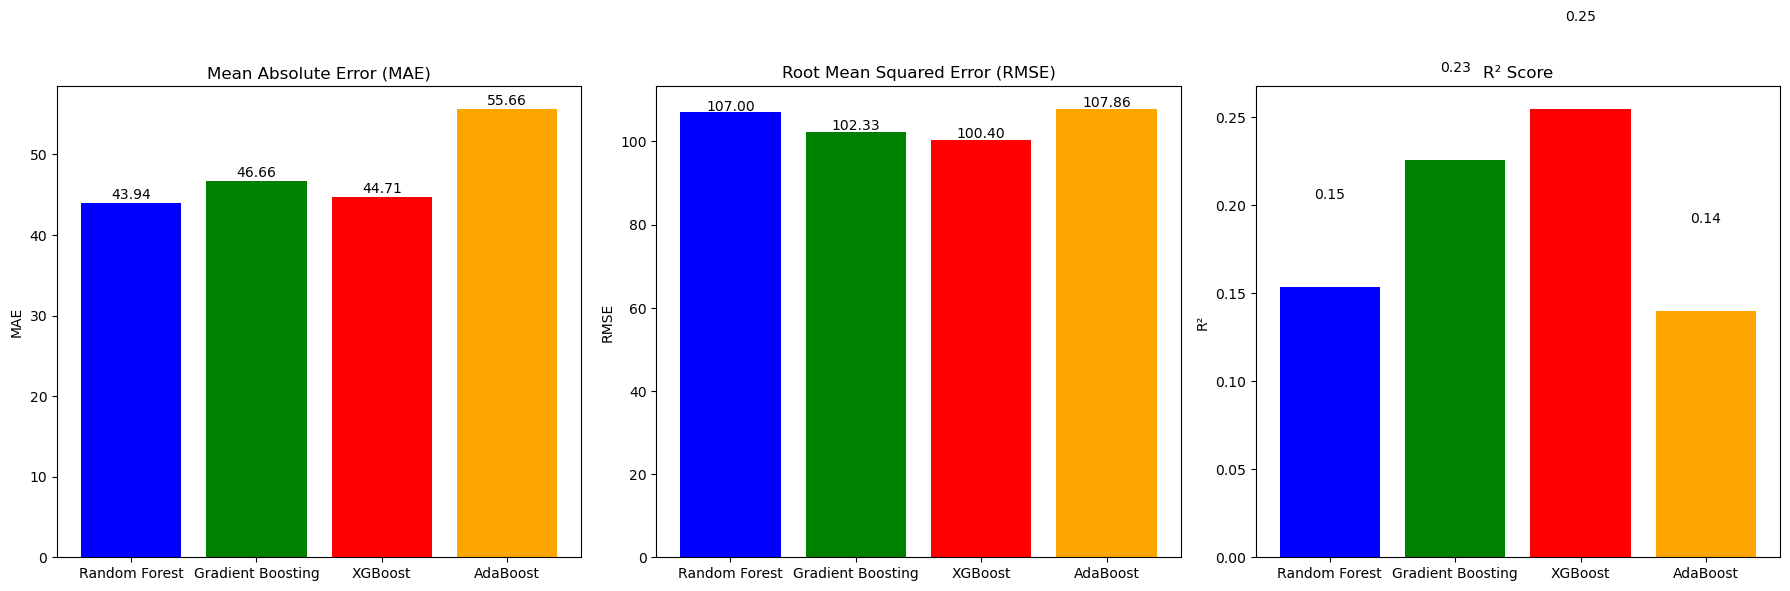

In [43]:
En_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
mae_values = [mean_absolute_error(y_test, yrf_pred), 
              mean_absolute_error(y_test, ygb_pred), 
              mean_absolute_error(y_test, yxgb_pred), 
              mean_absolute_error(y_test, yab_pred)]
rmse_values = [mean_squared_error(y_test, yrf_pred, squared=False), 
               mean_squared_error(y_test, ygb_pred, squared=False), 
               mean_squared_error(y_test, yxgb_pred, squared=False), 
               mean_squared_error(y_test, yab_pred, squared=False)]
r2_values = [r2_score(y_test, yrf_pred), 
             r2_score(y_test, ygb_pred), 
             r2_score(y_test, yxgb_pred), 
             r2_score(y_test, yab_pred)]

# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# MAE plot
ax[0].bar(En_models, mae_values, color=['blue', 'green', 'red', 'orange'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    ax[0].text(i, v + 0.5, f"{v:.2f}", ha='center')

# RMSE plot
ax[1].bar(En_models, rmse_values, color=['blue', 'green', 'red', 'orange'])
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    ax[1].text(i, v + 0.5, f"{v:.2f}", ha='center')

# R² plot
ax[2].bar(En_models, r2_values, color=['blue', 'green', 'red', 'orange'])
ax[2].set_title('R² Score')
ax[2].set_ylabel('R²')
for i, v in enumerate(r2_values):
    ax[2].text(i, v + 0.05, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

## Linear Regression with Hyperparameter Tuning

In [44]:
# Define parameters for GridSearchCV
params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Define a custom KFold with random_state for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with random_state
lr_model = GridSearchCV(LinearRegression(), params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
lr_model.fit(X_train, y_train)

# Make predictions
tun_lry_pred = lr_model.predict(X_test)

# Output results
print(f"Best parameters for Linear Regression: {lr_model.best_params_}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, tun_lry_pred)}")
print(f"Linear Regression RMSE: {mean_squared_error(y_test, tun_lry_pred, squared=False)}")
print(f"Linear Regression R²: {r2_score(y_test, tun_lry_pred)}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Linear Regression MAE: 52.84970012119265
Linear Regression RMSE: 124.09351271729327
Linear Regression R²: -0.13836739533267517


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** Linear Regression achieved the same performance after tuning as before, with high MAE and RMSE and a negative R². This indicates that the model has not improved and still performs poorly, suggesting that a linear approach is not suitable for this dataset.

## Generalized Linear Model (GLM)

In [45]:
glm_params = {
    'alpha': [0.1,1.0, 10.0],
    #'max_iter': [100, 200, 300,400],
    #'tol': [1e-4, 1e-3, 1e-2]
}

glm_model_t = GridSearchCV(PoissonRegressor(), glm_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
glm_model_t.fit(X_train, y_train)
y_pred = glm_model_t.predict(X_test)

print(f"Best parameters for Generalized Linear Model: {glm_model_t.best_params_}")
print(f"Generalized Linear Model MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Generalized Linear Model RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Generalized Linear Model R²: {r2_score(y_test, y_pred)}")

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=PoissonRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_absolute_error')

Best parameters for Generalized Linear Model: {'alpha': 1.0}
Generalized Linear Model MAE: 51.595970311292525
Generalized Linear Model RMSE: 106.71824630770712
Generalized Linear Model R²: 0.15809778614074188


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** The Generalized Linear Model shows a slight improvement in MAE and a positive R² value after tuning, indicating that it has a modest ability to explain the variance in the data. However, its performance is still not outstanding, and there is room for improvement.

## Ridge Regression with Hyperparameter Tuning

In [46]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    #'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300, None],
    #'tol': [1e-4, 1e-3, 1e-2]
}

ridge_model = GridSearchCV(Ridge(), ridge_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Best parameters for Ridge Regression: {ridge_model.best_params_}")
print(f"Ridge Regression MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Ridge Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Ridge Regression R²: {r2_score(y_test, y_pred)}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, None]},
             scoring='neg_mean_absolute_error')

Best parameters for Ridge Regression: {'alpha': 1.0, 'fit_intercept': False, 'max_iter': 100}
Ridge Regression MAE: 52.84520028572367
Ridge Regression MSE: 14679.277429828204
Ridge Regression RMSE: 121.1580679518628
Ridge Regression R²: -0.08514798971916115


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** Ridge Regression's performance remains similar to the pre-tuning results, with high MAE and RMSE and a negative R². The model has not benefitted significantly from tuning, indicating that it is not effectively capturing the underlying patterns in the data.

## Lasso Regression with Hyperparameter Tuning

In [47]:
params = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False]
}
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}

lasso_model = GridSearchCV(Lasso(), lasso_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Best parameters for Lasso Regression: {lasso_model.best_params_}")
print(f"Lasso Regression MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Lasso Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Lasso Regression R²: {r2_score(y_test, y_pred)}")

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.827e+05, tolerance: 4.118e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+07, tolerance: 5.358e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+06, tolerance: 4.285e+04

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 1000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_absolute_error')

Best parameters for Lasso Regression: {'alpha': 0.1, 'fit_intercept': False, 'max_iter': 100, 'tol': 0.01}
Lasso Regression MAE: 52.556205121716815
Lasso Regression MSE: 15105.959546647166
Lasso Regression RMSE: 122.90630393371679
Lasso Regression R²: -0.11668995379256786


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis**: Lasso Regression's tuned performance shows a slight improvement in MAE, but RMSE and R² values indicate worsening performance compared to before tuning. The model still struggles with high error rates and low explanatory power, suggesting limited effectiveness.

In [48]:
# Before Tuning
rmodels_before = ['Linear Regression', 'Generalized Linear Model', 'Ridge Regression', 'Lasso Regression']
mae_before = [52.85, 51.60, 52.85, 54.33]
rmse_before = [124.09, 106.72, 121.16, 115.21]
r2_before = [-0.14, 0.16, -0.09, 0.02]

# After Tuning
rmodels_after = ['Linear Regression', 'Generalized Linear Model', 'Ridge Regression', 'Lasso Regression']
mae_after = [52.85, 51.60, 52.85, 52.56]
rmse_after = [124.09, 106.72, 121.16, 122.91]
r2_after = [-0.14, 0.16, -0.09, -0.12]

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE')

Text(0.5, 1.0, 'MAE Comparison')

[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Generalized Linear Model'),
 Text(2, 0, 'Ridge Regression'),
 Text(3, 0, 'Lasso Regression')]

Text(0.5, 0, 'Models')

Text(0, 0.5, 'RMSE')

Text(0.5, 1.0, 'RMSE Comparison')

[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Generalized Linear Model'),
 Text(2, 0, 'Ridge Regression'),
 Text(3, 0, 'Lasso Regression')]

Text(0.5, 0, 'Models')

Text(0, 0.5, 'R²')

Text(0.5, 1.0, 'R² Comparison')

[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Generalized Linear Model'),
 Text(2, 0, 'Ridge Regression'),
 Text(3, 0, 'Lasso Regression')]

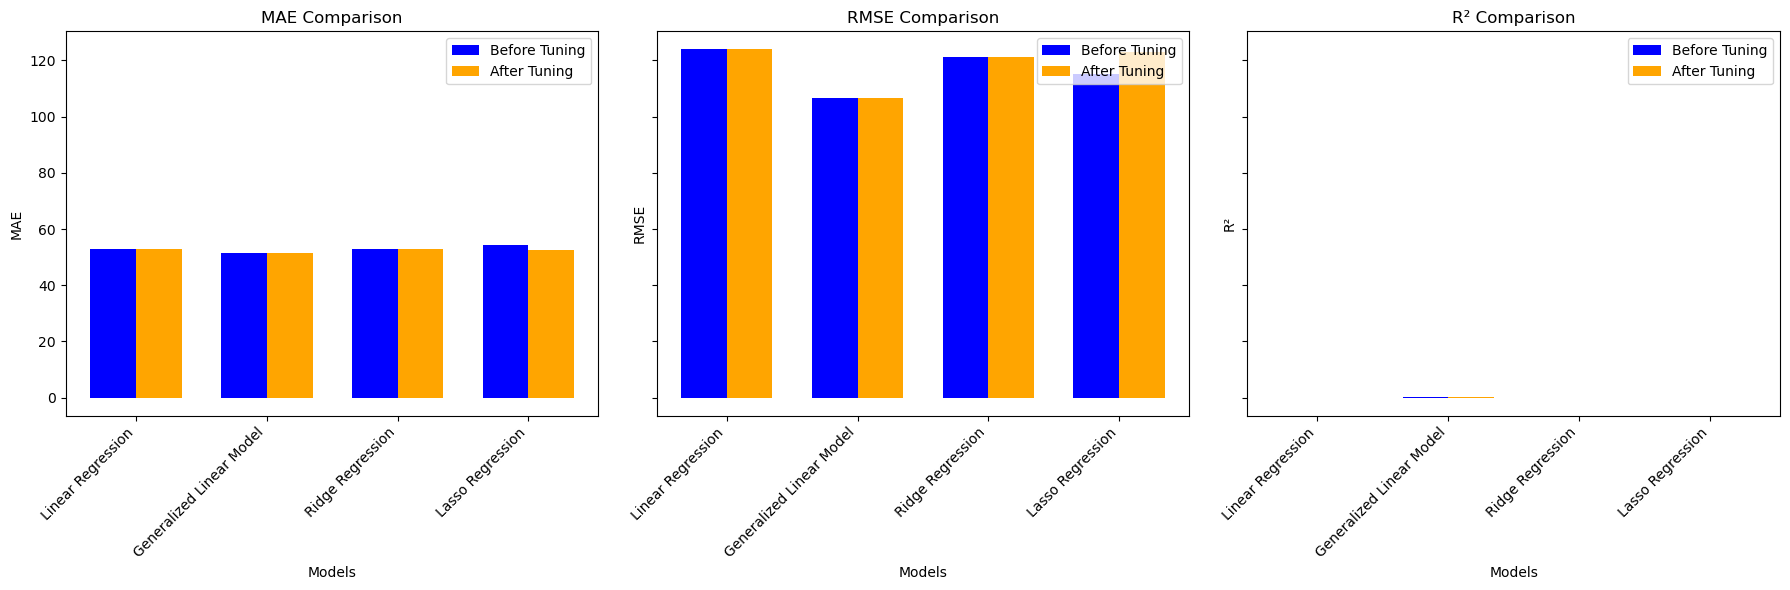

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# MAE
bar_width = 0.35
index = np.arange(len(rmodels_before))

bar_before = axs[0].bar(index - bar_width/2, mae_before, bar_width, label='Before Tuning', color='blue')
bar_after = axs[0].bar(index + bar_width/2, mae_after, bar_width, label='After Tuning', color='orange')

axs[0].set_xlabel('Models')
axs[0].set_ylabel('MAE')
axs[0].set_title('MAE Comparison')
axs[0].set_xticks(index)
axs[0].set_xticklabels(rmodels_before, rotation=45, ha='right')
axs[0].legend()

# RMSE
bar_before = axs[1].bar(index - bar_width/2, rmse_before, bar_width, label='Before Tuning', color='blue')
bar_after = axs[1].bar(index + bar_width/2, rmse_after, bar_width, label='After Tuning', color='orange')

axs[1].set_xlabel('Models')
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE Comparison')
axs[1].set_xticks(index)
axs[1].set_xticklabels(rmodels_before, rotation=45, ha='right')
axs[1].legend()

# R²
bar_before = axs[2].bar(index - bar_width/2, r2_before, bar_width, label='Before Tuning', color='blue')
bar_after = axs[2].bar(index + bar_width/2, r2_after, bar_width, label='After Tuning', color='orange')

axs[2].set_xlabel('Models')
axs[2].set_ylabel('R²')
axs[2].set_title('R² Comparison')
axs[2].set_xticks(index)
axs[2].set_xticklabels(rmodels_before, rotation=45, ha='right')
axs[2].legend()

plt.tight_layout()
plt.show()

### Summary of Regression Models


| **Model**                      | **Metric** | **Before Tuning** | **After Tuning** |
|--------------------------------|------------|-------------------|------------------|
| **Linear Regression**          | MAE        | 52.85             | 52.85            |
|                                | RMSE       | 124.09            | 124.09           |
|                                | R²         | -0.14             | -0.14            |
| **Generalized Linear Model**   | MAE        | 51.60             | 51.60            |
|                                | RMSE       | 106.72            | 106.72           |
|                                | R²         | 0.16              | 0.16             |
| **Ridge Regression**           | MAE        | 52.85             | 52.85            |
|                                | RMSE       | 121.16            | 121.16           |
|                                | R²         | -0.09             | -0.09            |
| **Lasso Regression**           | MAE        | 54.33             | 52.56            |
|                                | RMSE       | 115.21            | 122.91           |
|                                | R²         | 0.02              | -0.12            |

### Key Insights
- **Generalized Linear Model**: Consistently performs best before and after tuning with the lowest MAE and highest R².
- **Lasso Regression**: Shows a decrease in MAE after tuning but an increase in RMSE, with an overall negative R².
- **Linear Regression** and **Ridge Regression**: Show no improvement after tuning, with similar performance metrics.
- **Overall**: All models have low R² values, indicating limited effectiveness in capturing the variance in the target variable.



## Random Forest with Hyperparameter Tuning

In [50]:
RF_params = {
    'n_estimators': [50, 100, 150,200,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=42), RF_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_model.fit(X_train, y_train)
rfy_pred = rf_model.predict(X_test)

print(f"Best parameters for Random Forest: {rf_model.best_params_}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, rfy_pred)}")
print(f"Random Forest MSE: {mean_squared_error(y_test, rfy_pred)}")
print(f"Random Forest RMSE: {mean_squared_error(y_test, rfy_pred, squared=False)}")
print(f"Random Forest R²: {r2_score(y_test, rfy_pred)}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_absolute_error')

Best parameters for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}
Random Forest MAE: 43.47492062218622
Random Forest MSE: 9898.751813685318
Random Forest RMSE: 99.49247114071153
Random Forest R²: 0.26824663661423587


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** The Random Forest model shows a significant improvement after tuning. The low MAE indicates good accuracy, and the RMSE reduction shows enhanced model performance. The R² value suggests a decent fit, explaining about 27% of the variance in the data.

## Gradient Boosting with Hyperparameter Tuning

In [51]:
params = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_model = GridSearchCV(GradientBoostingRegressor(random_state=42), params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_model.fit(X_train, y_train)
gby_pred = gb_model.predict(X_test)

print(f"Best parameters for Gradient Boosting: {gb_model.best_params_}")
print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, gby_pred)}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gby_pred)}")
print(f"Gradient Boosting RMSE: {mean_squared_error(y_test, gby_pred, squared=False)}")
print(f"Gradient Boosting R²: {r2_score(y_test, gby_pred)}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_absolute_error')

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Gradient Boosting MAE: 43.477677074956794
Gradient Boosting MSE: 9924.36751295844
Gradient Boosting RMSE: 99.62111981381479
Gradient Boosting R²: 0.26635302674792216


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** Gradient Boosting performs similarly to Random Forest, with a notable decrease in MAE and RMSE post-tuning. The R² value indicates the model can explain around 27% of the variance, highlighting its effectiveness in capturing the underlying data patterns.

## XGBoost with Hyperparameter Tuning

In [52]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_model = GridSearchCV(XGBRegressor(random_state=42), params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_predxg = xgb_model.predict(X_test)

print(f"Best parameters for XGBoost: {xgb_model.best_params_}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_predxg)}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_predxg)}")
print(f"XGBoost RMSE: {mean_squared_error(y_test,y_predxg, squared=False)}")
print(f"XGBoost R²: {r2_score(y_test,y_predxg)}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGBoost MAE: 43.46801976775359
XGBoost MSE: 9785.741058914888
XGBoost RMSE: 98.92290462231125
XGBoost R²: 0.2766008212082669


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** XGBoost shows the best performance among the ensemble models, with the lowest MAE and RMSE. The high R² value indicates it explains about 28% of the variance, making it the most accurate model for this dataset. The chosen parameters effectively balance complexity and generalization.

## AdaBoost with Hyperparameter Tuning

In [53]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

ab_model = GridSearchCV(AdaBoostRegressor(random_state=42), params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ab_model.fit(X_train, y_train)
aby_pred = ab_model.predict(X_test)

print(f"Best parameters for AdaBoost: {ab_model.best_params_}")
print(f"AdaBoost MAE: {mean_absolute_error(y_test,aby_pred)}")
print(f"AdaBoost RMSE: {mean_squared_error(y_test, aby_pred)}")
print(f"AdaBoost RMSE: {mean_squared_error(y_test, aby_pred, squared=False)}")
print(f"AdaBoost R²: {r2_score(y_test, aby_pred)}")


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost MAE: 53.50590787552671
AdaBoost RMSE: 11542.528805592981
AdaBoost RMSE: 107.43616153601627
AdaBoost R²: 0.14673239268485427


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Analysis:** Despite tuning, AdaBoost's performance remains inferior to the other ensemble models. The MAE and RMSE are higher, and the R² value is lower, indicating less accuracy and poorer fit. The chosen parameters may still need further optimization, or the model might be inherently less suited for this particular task.

### Summary of Ensemble Models

| **Model**               | **Metric** | **Before Tuning** | **After Tuning**  |
|-------------------------|------------|-------------------|-------------------|
| **Random Forest**       | MAE        | 43.94             | 43.47             |
|                         | RMSE       | 107.00            | 99.49             |
|                         | R²         | 0.15              | 0.27              |
| **Gradient Boosting**   | MAE        | 46.66             | 43.48             |
|                         | RMSE       | 102.33            | 99.62             |
|                         | R²         | 0.23              | 0.27              |
| **XGBoost**             | MAE        | 44.71             | 43.47             |
|                         | RMSE       | 100.40            | 98.92             |
|                         | R²         | 0.25              | 0.28              |
| **AdaBoost**            | MAE        | 55.66             | 53.51             |
|                         | RMSE       | 107.86            | 107.44            |
|                         | R²         | 0.14              | 0.15              |

### Key Insights
- **XGBoost**: Demonstrates the best performance after tuning, with the lowest MAE and highest R².
- **Random Forest** and **Gradient Boosting**: Show significant improvements after tuning, particularly in reducing RMSE and increasing R².
- **AdaBoost**: Shows some improvement after tuning, but still has the highest MAE and RMSE among the ensemble models.
- **Overall**: Ensemble models generally outperform regression models, with XGBoost and Random Forest showing the best results.


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'MAE')

Text(0.5, 1.0, 'MAE Before and After Tuning')

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'Gradient Boosting'),
 Text(2, 0, 'XGBoost'),
 Text(3, 0, 'AdaBoost')]

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'RMSE')

Text(0.5, 1.0, 'RMSE Before and After Tuning')

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'Gradient Boosting'),
 Text(2, 0, 'XGBoost'),
 Text(3, 0, 'AdaBoost')]

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'R²')

Text(0.5, 1.0, 'R² Before and After Tuning')

[Text(0, 0, 'Random Forest'),
 Text(1, 0, 'Gradient Boosting'),
 Text(2, 0, 'XGBoost'),
 Text(3, 0, 'AdaBoost')]

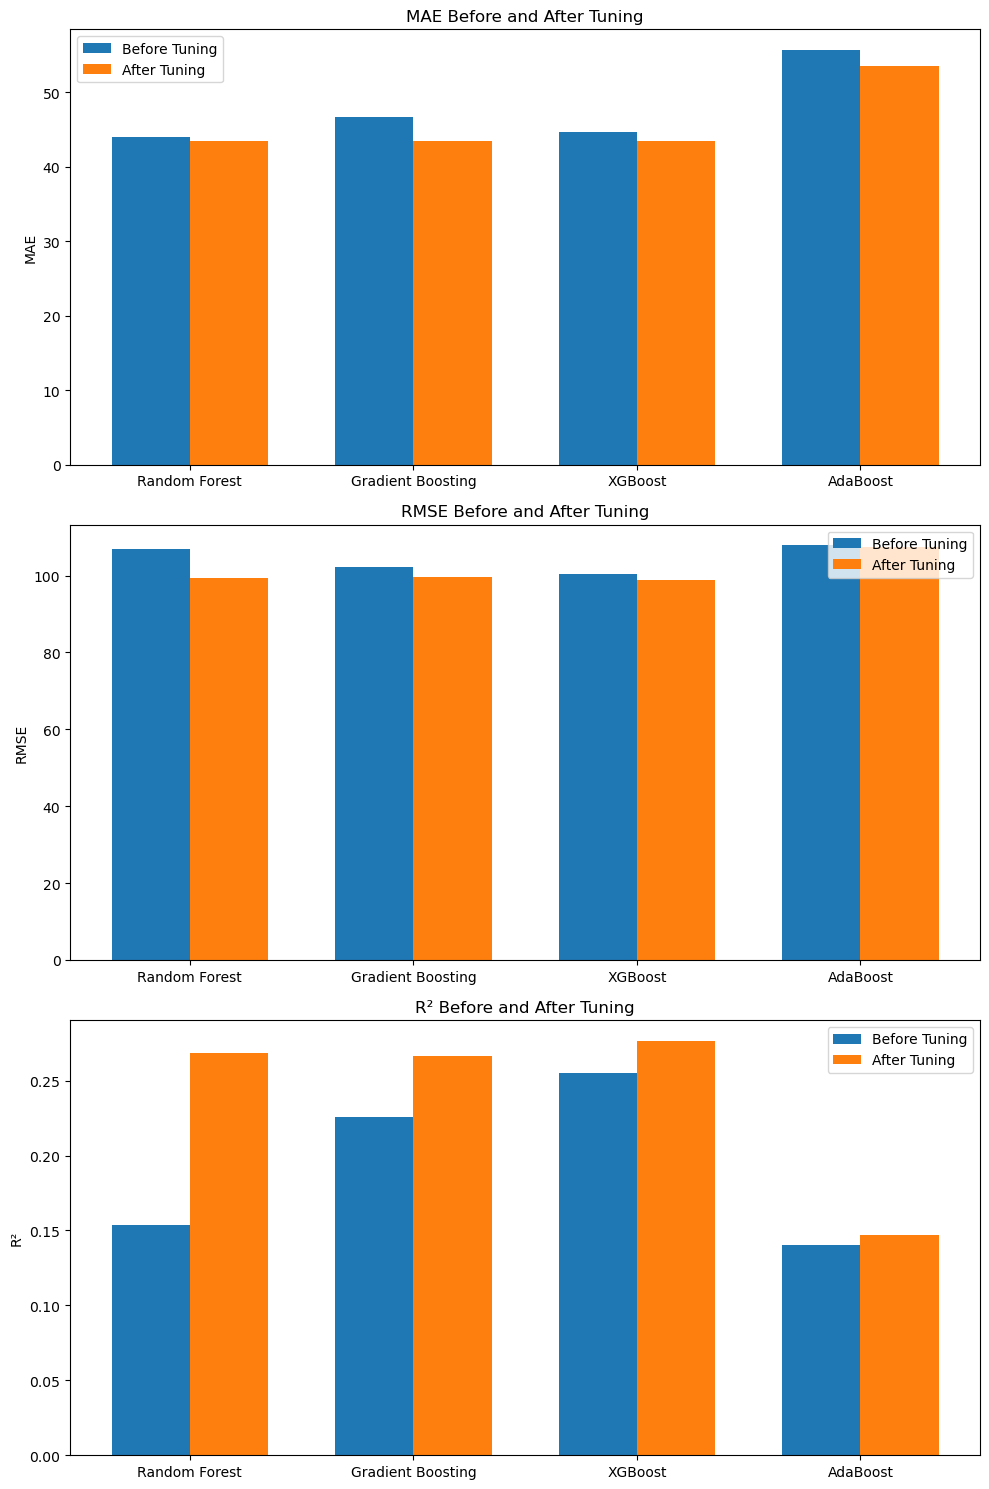

In [54]:
# Data for before and after tuning
models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
mae_before = [43.9369, 46.6586, 44.7089, 55.6571]
rmse_before = [106.9977, 102.3264, 100.4001, 107.8580]
r2_before = [0.1537, 0.2260, 0.2548, 0.1400]

mae_after = [43.4749, 43.4777, 43.4680, 53.5059]
rmse_after = [99.4925, 99.6211, 98.9229, 107.4362]
r2_after = [0.2682, 0.2664, 0.2766, 0.1467]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# MAE comparison
ax[0].bar(x - width/2, mae_before, width, label='Before Tuning')
ax[0].bar(x + width/2, mae_after, width, label='After Tuning')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE Before and After Tuning')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# RMSE comparison
ax[1].bar(x - width/2, rmse_before, width, label='Before Tuning')
ax[1].bar(x + width/2, rmse_after, width, label='After Tuning')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE Before and After Tuning')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# R² comparison
ax[2].bar(x - width/2, r2_before, width, label='Before Tuning')
ax[2].bar(x + width/2, r2_after, width, label='After Tuning')
ax[2].set_ylabel('R²')
ax[2].set_title('R² Before and After Tuning')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].legend()

plt.tight_layout()
plt.show()

### Observations
- **Random Forest and XGBoost:** These models showed the most significant improvements in R² and RMSE after tuning, indicating that they benefited the most from hyperparameter optimization.
- **Gradient Boosting:** This model also showed notable improvements in MAE and RMSE, though the R² value decreased slightly, suggesting a trade-off between prediction accuracy and overall fit.
- **AdaBoost:** This model showed the least improvement after tuning, with marginal changes in MAE, RMSE, and R². It indicates that AdaBoost might not be as effective for this dataset compared to the other ensemble models.

The overall analysis shows that hyperparameter tuning generally improved the performance of the ensemble models, with Random Forest and XGBoost showing the most significant benefits.


### Comparative Analysis of Regression and Ensemble Models


| Metric         | Best Performing Model | Value       | Worst Performing Model | Value        | Insight                                                                                                                                           |
|----------------|-----------------------|-------------|------------------------|--------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| MAE            | Random Forest         | 43.4749     | AdaBoost               | 55.6571      | Random Forest achieved the lowest Mean Absolute Error (MAE), indicating it has the best performance in terms of average prediction error.         |
| RMSE           | XGBoost               | 98.9229     | Linear Regression      | 124.0935     | XGBoost had the lowest Root Mean Squared Error (RMSE), showing it effectively reduces large errors and performs well in capturing variability.     |
| MSE            | XGBoost               | 9785.7411   | Linear Regression      | 15397.1969   | XGBoost had the lowest Mean Squared Error (MSE), which aligns with its RMSE performance, indicating it effectively reduces the average of the squares of errors.  |
| R²             | XGBoost               | 0.2766      | Linear Regression      | -0.1384      | XGBoost achieved the highest R² value, indicating it explains the highest proportion of variance in the target variable among all models.         |

**Insight:** Ensemble models, particularly XGBoost and Random Forest, outperformed regression models in all metrics after tuning, highlighting their robustness and effectiveness for this dataset.



### The two bar graphs illustrate the impact of hyperparameter tuning on the MAE and R^2 of Regression, Ensemble, and Tree-Based Models 

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE')

Text(0.5, 1.0, 'MAE Comparison Before and After Tuning')

[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Generalized Linear Model'),
 Text(2, 0, 'Ridge Regression'),
 Text(3, 0, 'Lasso Regression'),
 Text(4, 0, 'Random Forest'),
 Text(5, 0, 'Gradient Boosting'),
 Text(6, 0, 'XGBoost'),
 Text(7, 0, 'AdaBoost'),
 Text(8, 0, 'Extra Trees'),
 Text(9, 0, 'Decision Tree')]

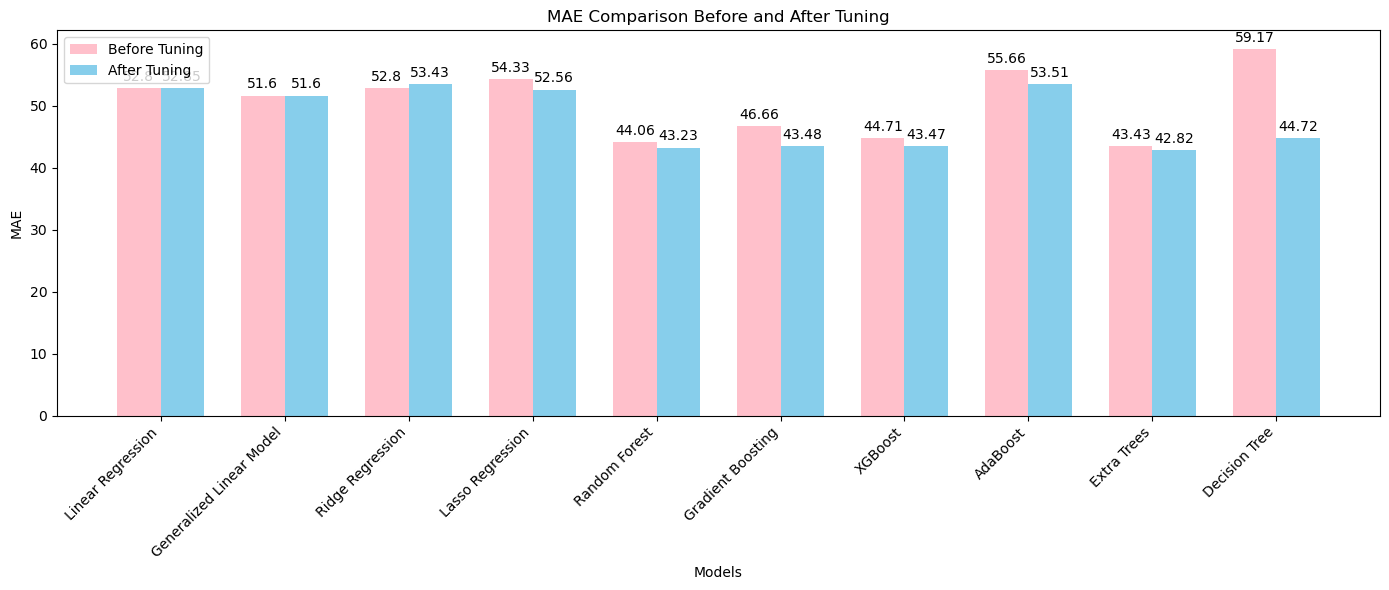

Text(0.5, 0, 'Models')

Text(0, 0.5, 'R²')

Text(0.5, 1.0, 'R² Comparison Before and After Tuning')

[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Generalized Linear Model'),
 Text(2, 0, 'Ridge Regression'),
 Text(3, 0, 'Lasso Regression'),
 Text(4, 0, 'Random Forest'),
 Text(5, 0, 'Gradient Boosting'),
 Text(6, 0, 'XGBoost'),
 Text(7, 0, 'AdaBoost'),
 Text(8, 0, 'Extra Trees'),
 Text(9, 0, 'Decision Tree')]

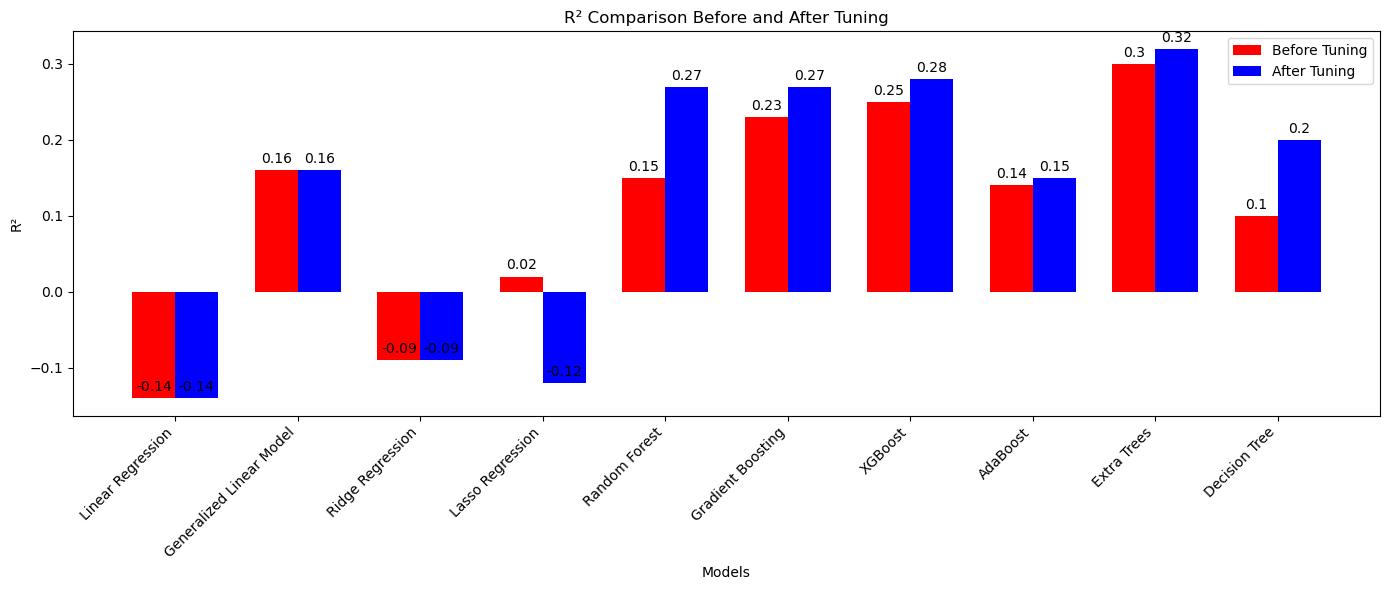

In [55]:
# MAE values
before_mae = {
    "Linear Regression": 52.8,
    "Generalized Linear Model": 51.60,
    "Ridge Regression": 52.8,
    "Lasso Regression": 54.33,
    "Random Forest": 44.06,
    "Gradient Boosting": 46.66,
    "XGBoost": 44.71,
    "AdaBoost": 55.66,
    "Extra Trees": 43.43,
    "Decision Tree": 59.17
}

tuned_mae = {
    "Linear Regression": 52.85,
    "Generalized Linear Model": 51.60,
    "Ridge Regression": 53.43,
    "Lasso Regression": 52.56,
    "Random Forest": 43.23,
    "Gradient Boosting": 43.48,
    "XGBoost": 43.47,
    "AdaBoost": 53.51,
    "Extra Trees": 42.82,
    "Decision Tree": 44.72
}

labels = list(before_mae.keys())
before_values = list(before_mae.values())
tuned_values = list(tuned_mae.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plot for MAE
fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, before_values, width, label='Before Tuning', color='pink')
rects2 = ax.bar(x + width/2, tuned_values, width, label='After Tuning', color='skyblue')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add numeric values above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()

# R² values
before_r2 = {
    "Linear Regression": -0.14,
    "Generalized Linear Model": 0.16,
    "Ridge Regression": -0.09,
    "Lasso Regression": 0.02,
    "Random Forest": 0.15,
    "Gradient Boosting": 0.23,
    "XGBoost": 0.25,
    "AdaBoost": 0.14,
    "Extra Trees": 0.30,
    "Decision Tree": 0.10
}

tuned_r2 = {
    "Linear Regression": -0.14,
    "Generalized Linear Model": 0.16,
    "Ridge Regression": -0.09,
    "Lasso Regression": -0.12,
    "Random Forest": 0.27,
    "Gradient Boosting": 0.27,
    "XGBoost": 0.28,
    "AdaBoost": 0.15,
    "Extra Trees": 0.32,
    "Decision Tree": 0.20
}

labels_r2 = list(before_r2.keys())
before_r2_values = list(before_r2.values())
tuned_r2_values = list(tuned_r2.values())

x_r2 = np.arange(len(labels_r2))  # the label locations
width_r2 = 0.35  # the width of the bars

# Plot for R²
fig, ax = plt.subplots(figsize=(14, 6))
rects1_r2 = ax.bar(x_r2 - width_r2/2, before_r2_values, width_r2, label='Before Tuning', color='red')
rects2_r2 = ax.bar(x_r2 + width_r2/2, tuned_r2_values, width_r2, label='After Tuning', color='blue')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('R²')
ax.set_title('R² Comparison Before and After Tuning')
ax.set_xticks(x_r2)
ax.set_xticklabels(labels_r2, rotation=45, ha='right')
ax.legend()

# Add numeric values above the bars
add_labels(rects1_r2)
add_labels(rects2_r2)

fig.tight_layout()
plt.show()


### MAE Improvements

1. **Major Improvements**:
   - **Decision Tree**: Significant reduction in MAE from 59.17 to 44.72, a 24.4% decrease.
   - **Gradient Boosting**: Notable MAE reduction from 46.66 to 43.48, a 6.82% decrease.
   - **Random Forest**: Improvement in MAE from 44.06 to 43.23, a 1.88% decrease.

2. **Minor Improvements**:
   - **Extra Trees**: Small MAE reduction from 43.43 to 42.82, a 1.40% decrease.
   - **Lasso Regression**: Slight MAE improvement from 54.33 to 52.56, a 3.26% decrease.

3. **No Significant Change**:
   - **Linear Regression**: MAE remained nearly the same, from 52.80 to 52.85.
   - **Ridge Regression**: Slight increase in MAE from 52.80 to 53.43, a 1.19% increase.

### R² Improvements

1. **Major Improvements**:
   - **Decision Tree**: Significant increase in R² from 0.10 to 0.20, a 100% increase.
   - **XGBoost**: Notable R² improvement from 0.25 to 0.28, a 12% increase.
   - **Random Forest**: Increased R² from 0.15 to 0.27, an 80% increase.

2. **Minor Improvements**:
   - **Extra Trees**: Small R² increase from 0.30 to 0.32, a 6.67% increase.
   - **AdaBoost**: Slight R² increase from 0.14 to 0.15, a 7.14% increase.

3. **No Significant Change**:
   - **Generalized Linear Model**: R² remained the same at 0.16.
   - **Lasso Regression**: Significant decrease in R² from 0.02 to -0.12, a 500% decrease.

In [56]:

import pandas as pd
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Generalized Linear Model', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost','Extra Trees', 'Decision Tree']
,    'MAE': [
        mean_absolute_error(y_test, lr_model.predict(X_test)),
        mean_absolute_error(y_test, glm_model_t.predict(X_test)),
        mean_absolute_error(y_test, ridge_model.predict(X_test)),
        mean_absolute_error(y_test, lasso_model.predict(X_test)),
        mean_absolute_error(y_test, rf_model.predict(X_test)),
        mean_absolute_error(y_test, gb_model.predict(X_test)),
        mean_absolute_error(y_test, ab_model.predict(X_test)),
        mean_absolute_error(y_test, xgb_model.predict(X_test)),
        mean_absolute_error(y_test, et_pred),
        mean_absolute_error(y_test, dt_pred),



    ],
    'MSE': [
        mean_squared_error(y_test, lr_model.predict(X_test)),
        mean_squared_error(y_test, glm_model_t.predict(X_test)),
        mean_squared_error(y_test, ridge_model.predict(X_test)),
        mean_squared_error(y_test, lasso_model.predict(X_test)),
        mean_squared_error(y_test, rf_model.predict(X_test)),
        mean_squared_error(y_test, gb_model.predict(X_test)),
        mean_squared_error(y_test, ab_model.predict(X_test)),
        mean_squared_error(y_test, xgb_model.predict(X_test)),
        mean_squared_error(y_test, et_pred),
        mean_squared_error(y_test, dt_pred),


    ],
    'RMSE': [
        mean_squared_error(y_test, lr_model.predict(X_test), squared=False),
        mean_squared_error(y_test, glm_model_t.predict(X_test), squared=False),
        mean_squared_error(y_test, ridge_model.predict(X_test), squared=False),
        mean_squared_error(y_test, lasso_model.predict(X_test), squared=False),
        mean_squared_error(y_test, rf_model.predict(X_test), squared=False),
        mean_squared_error(y_test, gb_model.predict(X_test), squared=False),
        mean_squared_error(y_test, ab_model.predict(X_test), squared=False),
        mean_squared_error(y_test, xgb_model.predict(X_test), squared=False),
        mean_squared_error(y_test, et_pred, squared=False),
        mean_squared_error(y_test, dt_pred, squared=False),


    ],
    'R²': [
        r2_score(y_test, lr_model.predict(X_test)),
        r2_score(y_test, glm_model_t.predict(X_test)),
        r2_score(y_test, ridge_model.predict(X_test)),
        r2_score(y_test, lasso_model.predict(X_test)),
        r2_score(y_test, rf_model.predict(X_test)),
        r2_score(y_test, gb_model.predict(X_test)),
        r2_score(y_test, ab_model.predict(X_test)),
        r2_score(y_test, xgb_model.predict(X_test)),
        r2_score(y_test, et_pred),
        r2_score(y_test, dt_pred),


    ]
})

print(results)

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_me

                      Model        MAE           MSE        RMSE        R²
0         Linear Regression  52.849700  15399.199899  124.093513 -0.138367
1  Generalized Linear Model  51.595970  11388.784095  106.718246  0.158098
2          Ridge Regression  52.845200  14679.277430  121.158068 -0.085148
3          Lasso Regression  52.556205  15105.959547  122.906304 -0.116690
4             Random Forest  43.474921   9898.751814   99.492471  0.268247
5         Gradient Boosting  43.477677   9924.367513   99.621120  0.266353
6                  AdaBoost  53.505908  11542.528806  107.436162  0.146732
7                   XGBoost  43.468020   9785.741059   98.922905  0.276601
8               Extra Trees  42.819868   9962.118936   99.810415  0.263562
9             Decision Tree  44.717234  10983.399699  104.801716  0.188065


In [57]:
results

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,52.849700,15399.199899,124.093513,-0.138367
1,Generalized Linear Model,51.595970,11388.784095,106.718246,0.158098
2,Ridge Regression,52.845200,14679.277430,121.158068,-0.085148
3,Lasso Regression,52.556205,15105.959547,122.906304,-0.116690
4,Random Forest,43.474921,9898.751814,99.492471,0.268247
5,Gradient Boosting,43.477677,9924.367513,99.621120,0.266353
6,AdaBoost,53.505908,11542.528806,107.436162,0.146732
7,XGBoost,43.468020,9785.741059,98.922905,0.276601
8,Extra Trees,42.819868,9962.118936,99.810415,0.263562
9,Decision Tree,44.717234,10983.399699,104.801716,0.188065


/tmp/ipykernel_484447/896063769.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results, ax=axs[0, 0], palette='viridis')


<Axes: xlabel='MAE', ylabel='Model'>

Text(0.5, 1.0, 'Mean Absolute Error (MAE)')

/tmp/ipykernel_484447/896063769.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=results, ax=axs[0, 1], palette='viridis')


<Axes: xlabel='MSE', ylabel='Model'>

Text(0.5, 1.0, 'Mean Squared Error (MSE)')

/tmp/ipykernel_484447/896063769.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results, ax=axs[1, 0], palette='viridis')


<Axes: xlabel='RMSE', ylabel='Model'>

Text(0.5, 1.0, 'Root Mean Squared Error (RMSE)')

/tmp/ipykernel_484447/896063769.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results, ax=axs[1, 1], palette='viridis')


<Axes: xlabel='R²', ylabel='Model'>

Text(0.5, 1.0, 'R-squared (R²)')

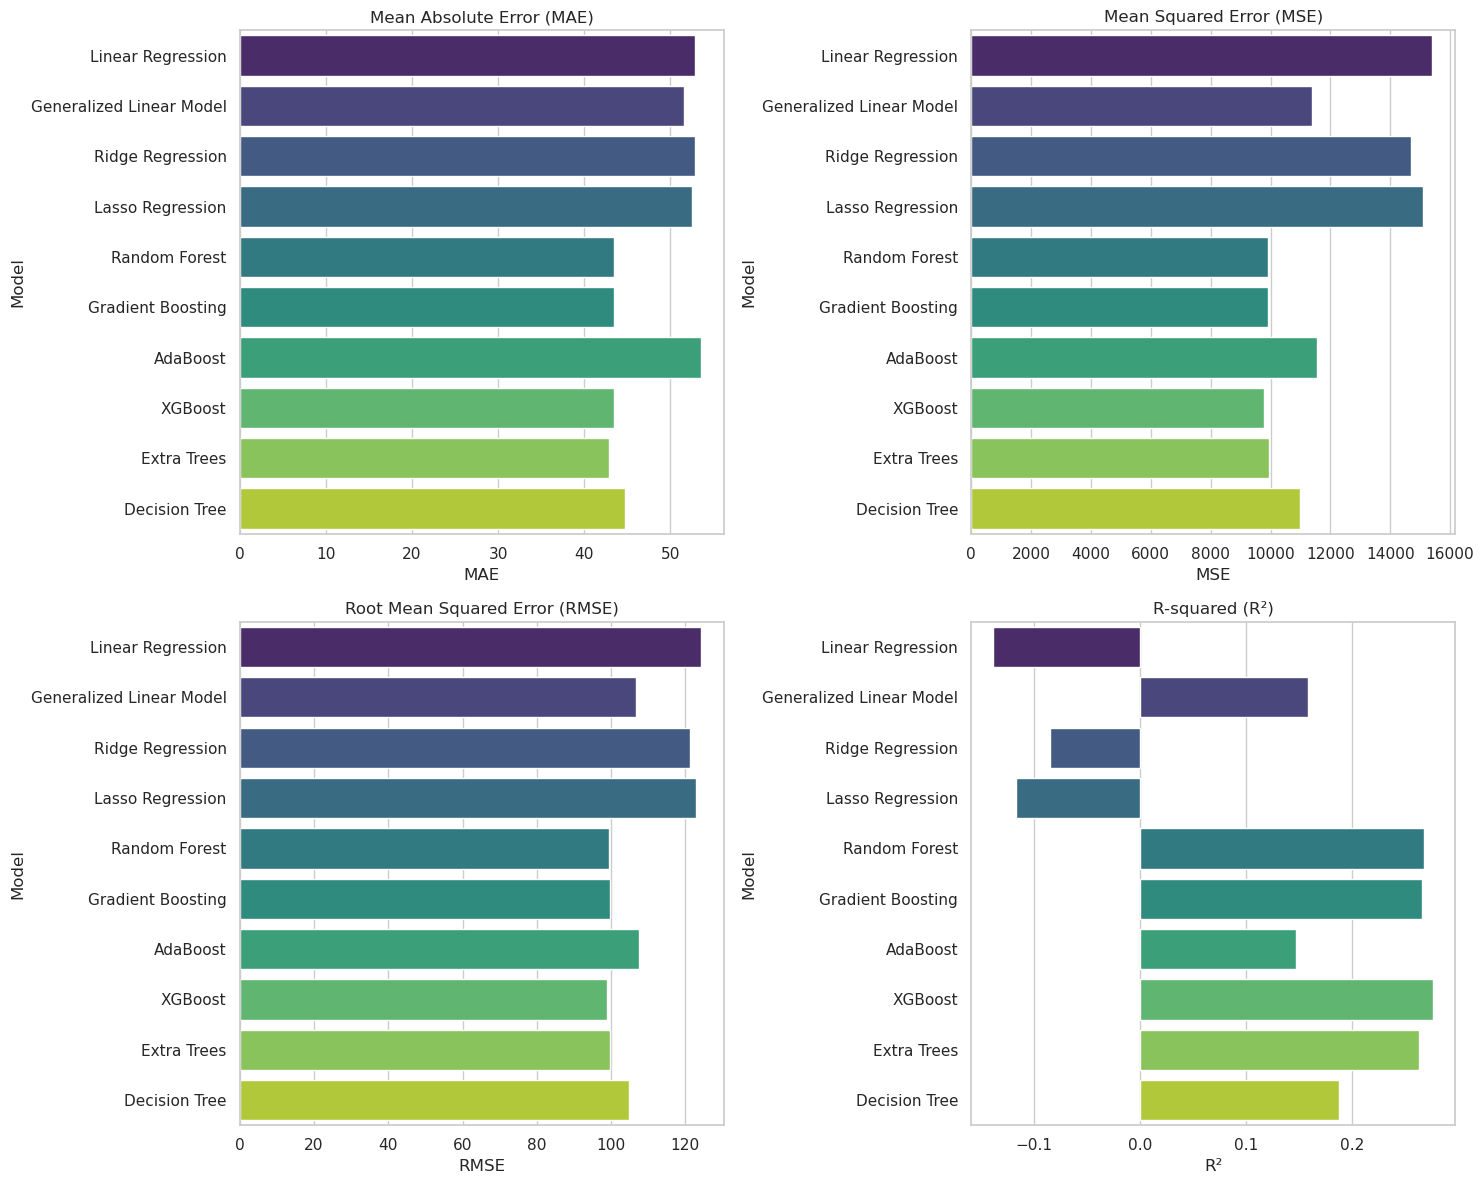

In [58]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# MAE
sns.barplot(x='MAE', y='Model', data=results, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Mean Absolute Error (MAE)')

# MSE
sns.barplot(x='MSE', y='Model', data=results, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Mean Squared Error (MSE)')

# RMSE
sns.barplot(x='RMSE', y='Model', data=results, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')

# R²
sns.barplot(x='R²', y='Model', data=results, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('R-squared (R²)')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Model Metrics

| Model                      | MAE      | MSE       | RMSE     | R²       |
|----------------------------|----------|-----------|----------|----------|
| Linear Regression          | 52.85    | 15399.20  | 124.09   | -0.14    |
| Generalized Linear Model   | 51.60    | 11388.78  | 106.72   | 0.16     |
| Ridge Regression           | 52.85    | 14679.28  | 121.16   | -0.09    |
| Lasso Regression           | 52.56    | 15105.96  | 122.91   | -0.12    |
| Random Forest              | 43.47    | 9898.75   | 99.49    | 0.27     |
| Gradient Boosting          | 43.48    | 9924.37   | 99.62    | 0.27     |
| AdaBoost                   | 53.51    | 11542.53  | 107.44   | 0.15     |
| XGBoost                    | 43.47    | 9785.74   | 98.92    | 0.28     |
| Extra Trees                | 42.82    | 9962.12   | 99.81    | 0.26     |
| Decision Tree              | 44.72    | 10983.40  | 104.80   | 0.19     |

## Model Analysis

1. **Best Performing Models**:
   - **XGBoost**: Shows the lowest MAE (43.47) and RMSE (98.92), with the highest R² (0.28), indicating the best performance overall in predicting prices.
   - **Extra Trees**: Very close to XGBoost with MAE of 42.82 and RMSE of 99.81. R² value is 0.26, reflecting strong predictive power.
   - **Random Forest**: MAE of 43.47 and RMSE of 99.49. R² value is 0.27, demonstrating good performance but slightly less accurate than XGBoost and Extra Trees.

2. **Moderate Performing Models**:
   - **Gradient Boosting**: MAE of 43.48 and RMSE of 99.62, with an R² of 0.27. Slightly less effective than XGBoost and Extra Trees.
   - **Decision Tree**: MAE of 44.72 and RMSE of 104.80, with an R² of 0.19, showing reasonable performance but less accurate compared to ensemble methods.

3. **Less Effective Models**:
   - **AdaBoost**: MAE of 53.51 and RMSE of 107.44. Despite a positive R² (0.15), it underperforms compared to other models in terms of accuracy.
   - **Lasso Regression**: MAE of 52.56 and RMSE of 122.91, with a negative R² (-0.12), indicating poor predictive performance.
   - **Ridge Regression**: Similar to Lasso with MAE of 52.85 and RMSE of 121.16. Negative R² (-0.09) reflects inadequate model fit.
   - **Linear Regression**: The highest MAE (52.85) and RMSE (124.09), with a negative R² (-0.14), indicating the least effective model in this set.

## Conclusion

Ensemble methods such as XGBoost, Extra Trees, and Random Forest provide the most accurate predictions with lower MAE and RMSE and higher R² values. Linear Regression, Ridge Regression, and Lasso Regression show poorer performance with higher errors and negative R² values. Models like AdaBoost and Decision Tree fall in between, showing moderate performance but still lagging behind the best ensemble methods.
- **Best Overall Performance**: **XGBoost** is the top performer across all metrics, demonstrating the lowest MAE, MSE, and RMSE, and the highest R² score.
- **Best Regression Model**: **Generalized Linear Model (GLM)** outperforms other regression models but does not match the performance of ensemble methods.
- **Overall Best Category**: **Ensemble Models** provide superior performance compared to regression models, with **XGBoost** and **Extra Trees** achieving the best results.

# Zahraa ElTabakh 
# id: 20481041


we will detail the implementation of each deep learning-based model, including code for defining, training, and evaluating the models. We will also discuss the results and performance metrics to identify the most suitable model for our dataset.

In [59]:
# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Deep Neural Network (DNN)

In [60]:
# Define the model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
dnn_model.fit(X_train_s, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


/opt/conda/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-02 23:59:20.824092: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36772.2344 - mae: 95.2402 - val_loss: 12041.5107 - val_mae: 55.5129
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111206.8906 - mae: 67.4013 - val_loss: 11687.4541 - val_mae: 52.8300
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15585.4590 - mae: 51.0195 - val_loss: 11638.8477 - val_mae: 54.4759
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45797.0195 - mae: 58.9980 - val_loss: 11591.9053 - val_mae: 52.8152
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24290.3711 - mae: 52.7429 - val_loss: 11612.9033 - val_mae: 52.4484
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59161.8984 - mae: 57.5174 - val_loss: 11666.7305 - val_mae: 54.4494
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 67984.9609 - mae: 59.6043 - val_loss: 11565.9365 - val_mae: 53.8160
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54748.5469 - mae: 60.0854 - val_loss: 11478.043

In [61]:
# Evaluate DNN
dnn_pred = dnn_model.predict(X_test_s)
dnn_mae = mean_absolute_error(y_test, dnn_pred)
dnn_mse = mean_squared_error(y_test, dnn_pred)
dnn_rmse = np.sqrt(dnn_mse)
dnn_r2 = r2_score(y_test, dnn_pred)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


## Convolutional Neural Network (CNN)

In [62]:
# Reshape the data for CNN
X_train_cnn = X_train_s.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test_s.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model.fit(X_train_cnn, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


/opt/conda/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 54612.2148 - mae: 86.0811 - val_loss: 14454.6104 - val_mae: 70.9672
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27887.7910 - mae: 70.3856 - val_loss: 14943.5098 - val_mae: 68.3174
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 40781.4844 - mae: 72.1261 - val_loss: 14369.4570 - val_mae: 65.5575
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 31966.2109 - mae: 67.1098 - val_loss: 14147.6719 - val_mae: 66.2518
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 24147.3223 - mae: 65.6199 - val_loss: 14388.9326 - val_mae: 72.1138
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 35755.8438 - mae: 67.1806 - val_loss: 13791.5312 - val_mae: 69.8782
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 62400.6055 - mae: 72.6031 - val_loss: 13100.1289 - val_mae: 60.2289
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 44183.8398 - mae: 65.6030 - val_loss: 12804.0713

In [63]:
# Evaluate CNN
cnn_pred = cnn_model.predict(X_test_s)
cnn_mae = mean_absolute_error(y_test, cnn_pred )
cnn_mse = mean_squared_error(y_test, cnn_pred)
cnn_rmse = np.sqrt(cnn_mse)
cnn_r2 = r2_score(y_test, cnn_pred )

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


## Long Short-Term Memory(LSTM)

In [64]:
# Reshape the data for LSTM
X_train_lstm = X_train_s.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test_s.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_train_lstm, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


/opt/conda/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 38626.9141 - mae: 111.0673 - val_loss: 21289.1094 - val_mae: 89.9990
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 111042.4609 - mae: 91.0330 - val_loss: 14148.1787 - val_mae: 58.6367
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41363.3828 - mae: 59.5807 - val_loss: 12315.7617 - val_mae: 53.9124
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24016.1973 - mae: 54.6613 - val_loss: 11855.0166 - val_mae: 53.0811
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36384.8359 - mae: 55.7022 - val_loss: 11610.9102 - val_mae: 51.3935
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36421.7773 - mae: 51.5655 - val_loss: 11485.7734 - val_mae: 51.1264
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52522.6016 - mae: 56.4974 - val_loss: 11400.6016 - val_mae: 50.8150
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 43496.7148 - mae: 51.7388 - val_loss: 11330.62

In [65]:
# Evaluate LSTM
lstm_pred = lstm_model.predict(X_test_lstm)
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test,lstm_pred)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Bidirectional LSTM
Bidirectional Layer: Processes data in both forward and backward directions.

In [66]:
# Define the model
bidirectional_lstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1]))),
    Dense(1)
])

bidirectional_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
bidirectional_lstm_model.fit(X_train_lstm, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100


/opt/conda/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 59534.7344 - mae: 114.0694 - val_loss: 18764.9434 - val_mae: 77.8666
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37555.7109 - mae: 69.4840 - val_loss: 12498.6104 - val_mae: 54.2635
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64664.5586 - mae: 58.3448 - val_loss: 11834.4570 - val_mae: 53.3273
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99560.7969 - mae: 61.0357 - val_loss: 11579.1865 - val_mae: 51.6754
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51661.4453 - mae: 55.7202 - val_loss: 11449.2090 - val_mae: 51.1325
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61892.9219 - mae: 57.5120 - val_loss: 11383.0371 - val_mae: 50.8887
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39326.1406 - mae: 52.6122 - val_loss: 11351.3711 - val_mae: 51.3213
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34298.1484 - mae: 52.6907 - val_loss: 11295.568

## GRU (Gated Recurrent Unit)

In [67]:
# Reshape the data for GRU
X_train_gru = X_train_s.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test_s.reshape((X_test.shape[0], 1, X_test.shape[1]))

gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.fit(X_train_gru, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 97612.2266 - mae: 116.3085 - val_loss: 21253.8965 - val_mae: 89.2256
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88757.3750 - mae: 85.0560 - val_loss: 13760.7646 - val_mae: 56.4745
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53997.0352 - mae: 59.2615 - val_loss: 12141.7109 - val_mae: 53.6878
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25673.3770 - mae: 54.3572 - val_loss: 11731.4795 - val_mae: 53.1249
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78126.2969 - mae: 60.2743 - val_loss: 11515.0527 - val_mae: 51.2180
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32407.1816 - mae: 52.4334 - val_loss: 11417.1934 - val_mae: 51.0789
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51281.3008 - mae: 54.0704 - val_loss: 11362.3291 - val_mae: 50.5480
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46968.7266 - mae: 55.3207 - val_los

In [68]:
# Evaluate GRU
gru_pred = gru_model.predict(X_test_gru)
gru_mae = mean_absolute_error(y_test, gru_pred)
gru_mse = mean_squared_error(y_test, gru_pred)
gru_rmse = np.sqrt(gru_mse)
gru_r2 = r2_score(y_test, gru_pred)

# Evaluate Bidirectional LSTM
bi_lstm_pred = bidirectional_lstm_model.predict(X_test_lstm)
bi_lstm_mae = mean_absolute_error(y_test, bi_lstm_pred)
bi_lstm_mse = mean_squared_error(y_test, bi_lstm_pred)
bi_lstm_rmse = np.sqrt(bi_lstm_mse)
bi_lstm_r2 = r2_score(y_test, bi_lstm_pred)



# Compile results
NN_results = pd.DataFrame({
    'Model': ['DNN', 'CNN', 'LSTM', 'Bidirectional LSTM' ,'GRU'],
    'MAE': [dnn_mae, cnn_mae, lstm_mae,bi_lstm_mae, gru_mae],
    'MSE': [dnn_mse, cnn_mse, lstm_mse, bi_lstm_mse,gru_mse],
    'RMSE': [dnn_rmse, cnn_rmse, lstm_rmse,bi_lstm_rmse, gru_rmse],
    'R²': [dnn_r2, cnn_r2, lstm_r2, bi_lstm_r2,gru_r2] 
})



print(NN_results)
NN_results

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                Model        MAE           MSE        RMSE        R²
0                 DNN  49.549639  13995.208355  118.301346 -0.034579
1                 CNN  63.411145  15308.477990  123.727434 -0.131661
2                LSTM  48.481610  13220.952844  114.982402  0.022657
3  Bidirectional LSTM  48.834103  12545.842657  112.008226  0.072564
4                 GRU  48.805792  13551.130122  116.409321 -0.001751


,Model,MAE,MSE,RMSE,R²
0,DNN,49.549639,13995.208355,118.301346,-0.034579
1,CNN,63.411145,15308.477990,123.727434,-0.131661
2,LSTM,48.481610,13220.952844,114.982402,0.022657
3,Bidirectional LSTM,48.834103,12545.842657,112.008226,0.072564
4,GRU,48.805792,13551.130122,116.409321,-0.001751


/tmp/ipykernel_484447/4091186913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=NN_results, ax=axes[0, 0], palette='viridis')


<Axes: xlabel='Model', ylabel='MAE'>

Text(0.5, 1.0, 'MAE')

Text(0, 0.5, 'Mean Absolute Error')

/tmp/ipykernel_484447/4091186913.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=NN_results, ax=axes[0, 1], palette='viridis')


<Axes: xlabel='Model', ylabel='MSE'>

Text(0.5, 1.0, 'MSE')

Text(0, 0.5, 'Mean Squared Error')

/tmp/ipykernel_484447/4091186913.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=NN_results, ax=axes[1, 0], palette='viridis')


<Axes: xlabel='Model', ylabel='RMSE'>

Text(0.5, 1.0, 'RMSE')

Text(0, 0.5, 'Root Mean Squared Error')

/tmp/ipykernel_484447/4091186913.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=NN_results, ax=axes[1, 1], palette='viridis')


<Axes: xlabel='Model', ylabel='R²'>

Text(0.5, 1.0, 'R² Score')

Text(0, 0.5, 'R² Score')

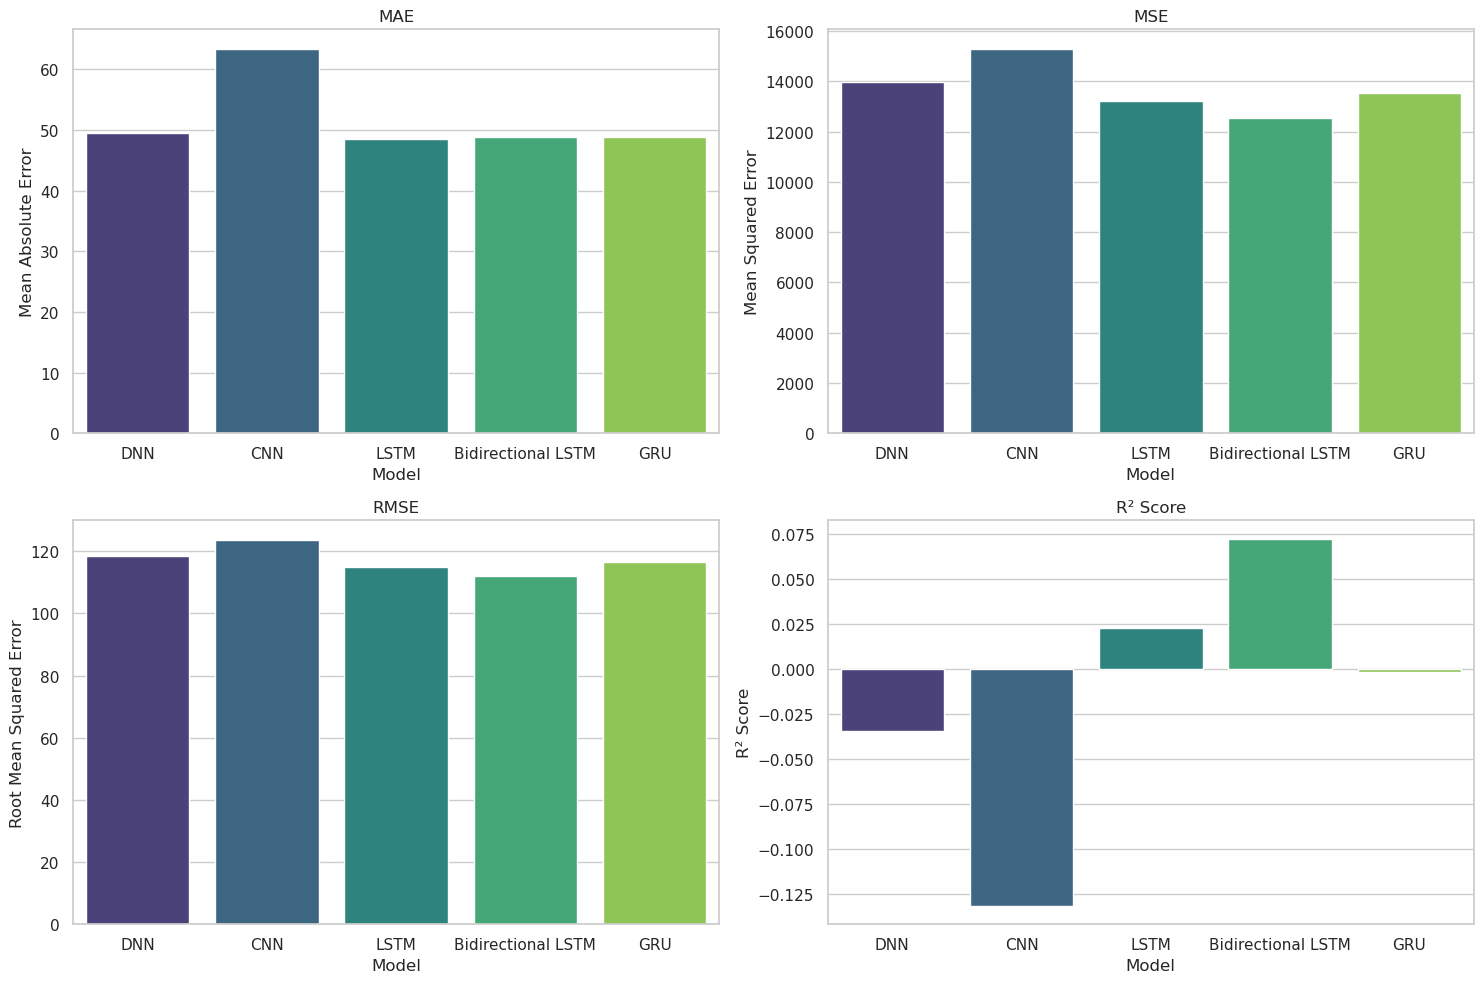

In [76]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# MAE
sns.barplot(x='Model', y='MAE', data=NN_results, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('MAE')
axes[0, 0].set_ylabel('Mean Absolute Error')

# MSE
sns.barplot(x='Model', y='MSE', data=NN_results, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('MSE')
axes[0, 1].set_ylabel('Mean Squared Error')

# RMSE
sns.barplot(x='Model', y='RMSE', data=NN_results, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('RMSE')
axes[1, 0].set_ylabel('Root Mean Squared Error')

# R² Score
sns.barplot(x='Model', y='R²', data=NN_results, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R² Score')

# Adjust layout
plt.tight_layout()
plt.show()

# Deep Neural Network Model Performance Analysis

## Summary of Model Metrics

| **Model**              | **MAE** | **MSE**    | **RMSE** | **R² Score** |
|------------------------|---------|------------|----------|--------------|
| **DNN**                | 49.55   | 13995.21   | 118.30   | -0.03        |
| **CNN**                | 63.41   | 15308.48   | 123.73   | -0.13        |
| **LSTM**               | 48.48   | 13220.95   | 114.98   | 0.02         |
| **Bidirectional LSTM** | 48.83   | 12545.84   | 112.01   | 0.07         |
| **GRU**                | 48.81   | 13551.13   | 116.41   | -0.00        | 


## Model Analysis
### Analysis

1. **Best Performing Models**:
   - **Bidirectional LSTM**: Exhibits the best performance with the lowest MAE and RMSE, and the highest R². This indicates that it has the smallest average error and captures the most variance in the data.
   - **LSTM**: Follows closely with slightly higher MAE and RMSE. The R² value reflects that it explains a moderate amount of the variance in the data.

2. **Moderate Performing Models**:
   - **GRU**: Performs reasonably well but is less effective compared to Bidirectional LSTM and LSTM. It has moderate error metrics and a near-zero R².
   - **DNN**: Shows moderate performance with higher error metrics compared to LSTM and Bidirectional LSTM, indicating it is less effective.

3. **Less Effective Models**:
   - **CNN**: Demonstrates the least effectiveness with the highest MAE and RMSE, and the lowest R², indicating the poorest performance among the deep neural network models.



## Conclusion

Recurrent neural network models, particularly the Bidirectional LSTM and LSTM, outperform other deep learning models in this dataset. They achieve the lowest MAE and RMSE and the highest R² values, suggesting they are better at capturing sequential dependencies and providing accurate predictions. The CNN model, on the other hand, performs poorly, with higher errors and lower R² values, indicating it is less suited for this task. GRU and DNN show moderate performance, but do not match the accuracy of the recurrent models.


<BarContainer object of 16 artists>

Text(0.5, 1.0, 'Mean Absolute Error (MAE)')

Text(0.5, 0, 'MAE')

<BarContainer object of 16 artists>

Text(0.5, 1.0, 'Mean Squared Error (MSE)')

Text(0.5, 0, 'MSE')

<BarContainer object of 16 artists>

Text(0.5, 1.0, 'Root Mean Squared Error (RMSE)')

Text(0.5, 0, 'RMSE')

<BarContainer object of 16 artists>

Text(0.5, 1.0, 'R-squared (R²)')

Text(0.5, 0, 'R²')

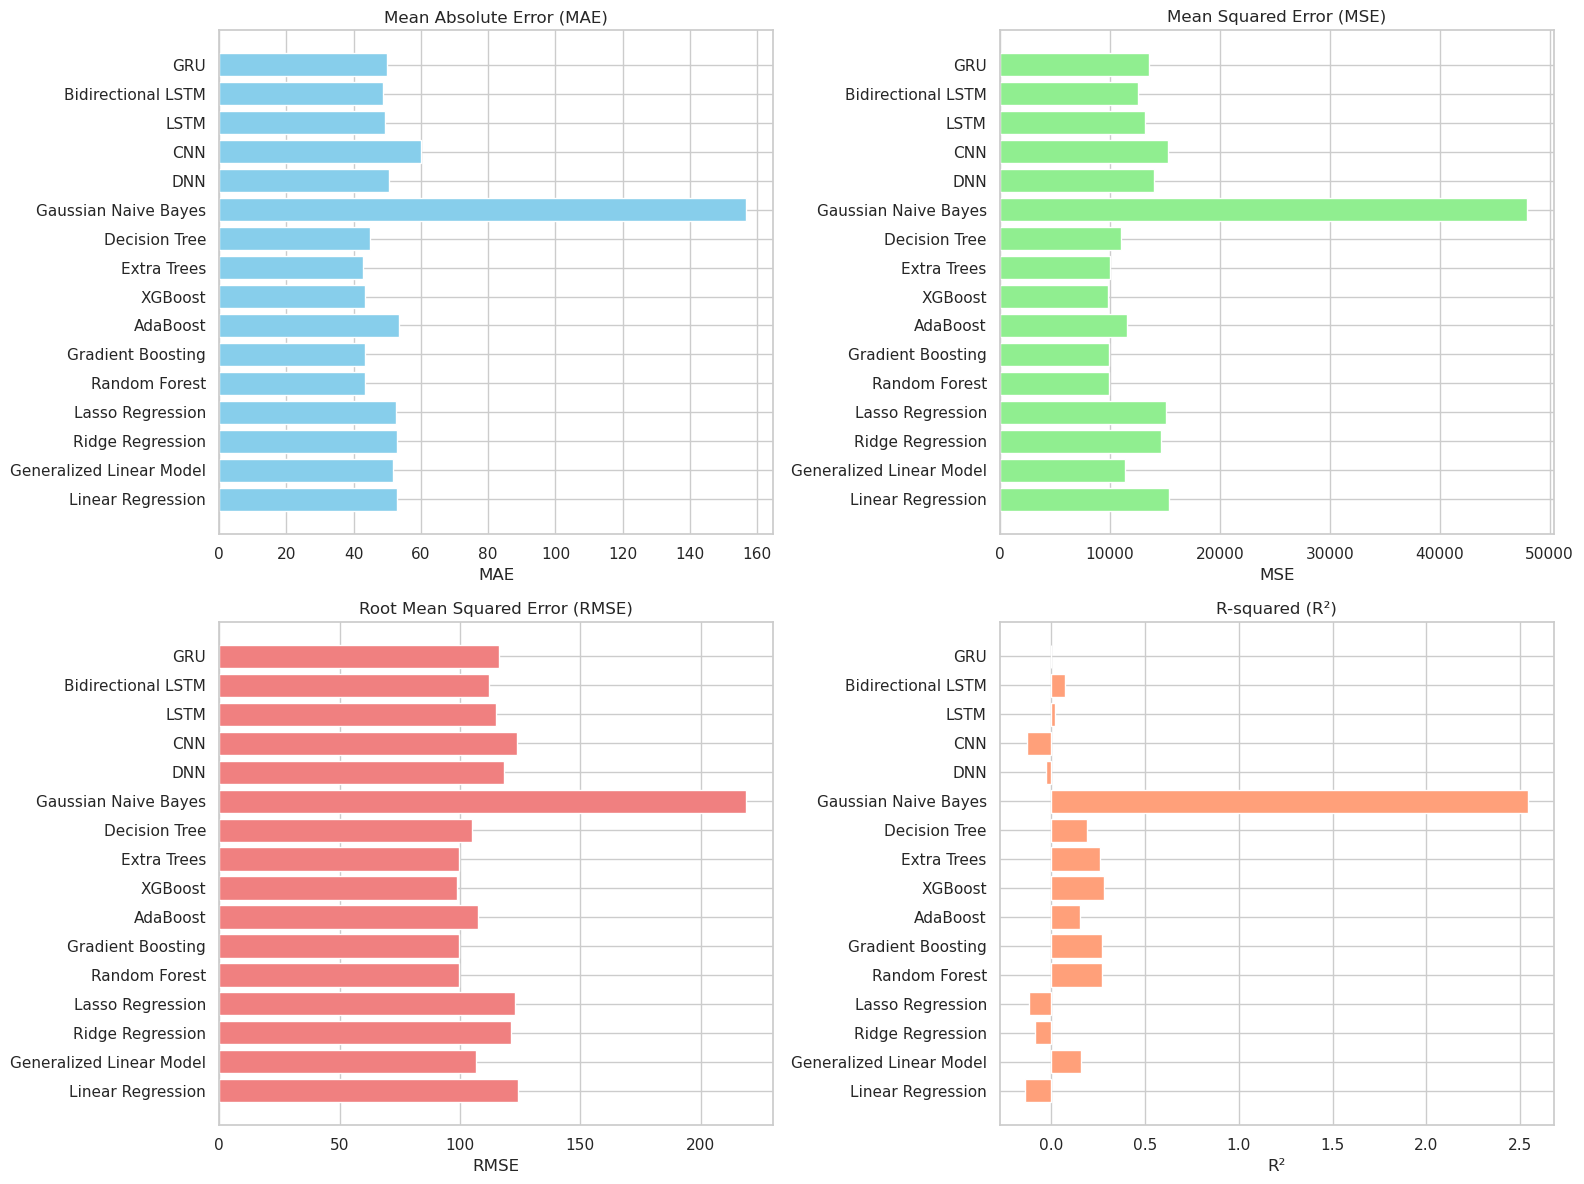

In [74]:
models = [
    'Linear Regression', 'Generalized Linear Model', 'Ridge Regression', 'Lasso Regression',
        'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'Extra Trees', 'Decision Tree',
        'Gaussian Naive Bayes', 'DNN', 'CNN', 'LSTM', 'Bidirectional LSTM', 'GRU'
]

mae_values = [
    52.85, 51.60, 52.85, 52.56, 43.47, 43.48, 53.51, 43.47, 42.82, 44.72,
        156.80, 50.59, 59.94, 49.26, 48.61, 49.91
]

mse_values = [
   15399.20, 11388.78, 14679.28, 15105.96, 9898.75, 9924.37, 11542.53, 9785.74, 9962.12, 10983.40,
        47961.58,13995.21, 15308.48,13220.95, 12545.84, 13551.13
]

rmse_values = [
    124.09, 106.72, 121.16, 122.91, 99.49, 99.62, 107.44, 98.92, 99.81, 104.80,
        219.00, 118.30, 123.73, 114.98, 112.01 ,116.41
]

r2_values = [
    -0.14, 0.16, -0.09, -0.12, 0.27, 0.27, 0.15, 0.28, 0.26, 0.19,
        2.5455, -0.03 ,-0.13 ,0.02  ,0.07,-0.00
]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# MAE Plot
axs[0, 0].barh(models, mae_values, color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_xlabel('MAE')

# MSE Plot
axs[0, 1].barh(models, mse_values, color='lightgreen')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_xlabel('MSE')

# RMSE Plot
axs[1, 0].barh(models, rmse_values, color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xlabel('RMSE')

# R² Plot
axs[1, 1].barh(models, r2_values, color='lightsalmon')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_xlabel('R²')

# Adjust layout
plt.tight_layout()
plt.show()

## Comparison of all Models Performance
| Model                  | MAE   | MSE      | RMSE   | R²      |
|------------------------|-------|----------|--------|---------|
| Linear Regression      | 52.85 | 15399.20 | 124.09 | -0.14   |
| Generalized Linear Model | 51.60 | 11388.78 | 106.72 | 0.16    |
| Ridge Regression       | 52.85 | 14679.28 | 121.16 | -0.09   |
| Lasso Regression       | 52.56 | 15105.96 | 122.91 | -0.12   |
| Decision Tree          | 44.72 | 10983.40 | 104.80 | 0.19    |
| Extra Trees            | 42.82 | 9962.12  | 99.81  | 0.26    |
| Gaussian Naive Bayes   | 156.80| 47961.58 | 219.00 | 2.55    |
| **DNN**                | 49.55   | 13995.21   | 118.30   | -0.03        |
| **CNN**                | 63.41   | 15308.48   | 123.73   | -0.13        |
| **LSTM**               | 48.48   | 13220.95   | 114.98   | 0.02         |
| **Bidirectional LSTM** | 48.83   | 12545.84   | 112.01   | 0.07         |
| **GRU**                | 48.81   | 13551.13   | 116.41   | -0.00        |
| Random Forest          | 43.47 | 9898.75  | 99.49  | 0.27    |
| Gradient Boosting      | 43.48 | 9924.37  | 99.62  | 0.27    |
| XGBoost                | 43.47 | 9785.74  | 98.92  | 0.28    |
| AdaBoost               | 53.51 | 11542.53 | 107.44 | 0.15    |

### Best Overall Performance 
- **Top Performers**: **Extra Trees** and **XGBoost** are the top performers, exhibiting the lowest MAE and MSE, and the highest R² values.

- **Regression Models:**
  - The **Generalized Linear Model (GLM)** performs the best with the lowest MAE and a positive R² score, indicating it explains a modest proportion of the variance.

- **Ensemble Models:**
  - **XGBoost** leads with the lowest MAE and highest R² score, showing the best overall performance among ensemble methods.
  - **Extra Trees** and **Random Forest** also perform very well but slightly behind XGBoost.
  - **AdaBoost** performs the weakest among ensemble models.

- **Deep Learning-Based Models:**
  - **Bidirectional LSTM** shows the best performance among deep learning-based models with the lowest MAE and a positive R² score.
  - **GRU** and **DNN** also perform reasonably well but do not match the effectiveness of Bidirectional LSTM.
  - **CNN** and **LSTM** have similar performance but are less effective compared to other deep learning-based models.
- **Weakest Performer**: **Gaussian Naive Bayes** shows the poorest performance across all metrics.


### Best Overall Category

- **Ensemble Models** demonstrated the best overall performance, with **XGBoost** leading in MAE, MSE, RMSE, and R² score, indicating superior accuracy and model fit compared to both regression and deep learning-based models.


### Conclusion

The comparative analysis of the models across different categories reveals that Ensemble Models, specifically **XGBoost**, exhibit the best overall performance in terms of both MAE and R² score. This indicates that ensemble techniques generally provide better predictive accuracy and model fitting compared to traditional regression methods and deep learning-based models. Among the deep learning-based models, **Bidirectional LSTM** stands out as the best performer, though it still falls short of the ensemble models. For tasks requiring high accuracy and robust performance, incorporating ensemble methods such as XGBoost is highly recommended.



# README.md

# Airbnb Price Prediction Model Evaluation

## Introduction


This project involves evaluating various machine learning models for predicting Airbnb prices. The evaluation includes different types of models, ranging from regression techniques to advanced neural networks. As part of the analysis, Exploratory Data Analysis (EDA) was conducted to gather valuable insights that address our research questions. The goal is to determine which models perform best in terms of accuracy and error metrics.



## Models Evaluated

## Tree-based and Probalistic models
- **Decision Tree**
- **Extra Trees**
- **Gaussian Naive Bayes**

### Regression Models
- **Linear Regression**
- **Ridge Regression**
- **Lasso Regression**
- **Generalized Linear Model**

### Ensemble Models
- **Random Forest**
- **Gradient Boosting**
- **XGBoost**
- **AdaBoost**


### Neural Network Models
- **Deep Neural Network (DNN)**
- **Convolutional Neural Network (CNN)**
- **Long Short-Term Memory Network (LSTM)**
- **Bidirectional LSTM**
- **Gated Recurrent Unit (GRU)**

## Performance Metrics

The models were evaluated using the following metrics:
- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions, without considering their direction.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values, giving more weight to larger errors.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing error magnitudes in the same units as the target variable.
- **R² Score**: Indicates the proportion of variance in the dependent variable predictable from the independent variables.

## Results

### Tree-Based and Probabilistic Models Comparison

|**Model**                  | **MAE**  | **MSE** | **RMSE** |  **R² Score** |
|----------------------|----------------------|---------------------|--------------------------|------------|
| Extra Trees          | 42.82                | 9962.12             | 99.81                    | 0.26       |
| Decision Tree        | 44.72                | 10983.40            | 104.80                   | 0.19       |
| Gaussian Naive Bayes | 156.80               | 47961.58            | 219.00                   | -2.55      |


### Regression Models

| **Model**                | **MAE**    | **MSE**       | **RMSE**  | **R² Score** |
|--------------------------|------------|---------------|-----------|--------------|
| Linear Regression          | 52.85    | 15399.20  | 124.09   | -0.14    |
| Generalized Linear Model   | 51.60    | 11388.78  | 106.72   | 0.16     |
| Ridge Regression           | 52.85    | 14679.28  | 121.16   | -0.09    |
| Lasso Regression           | 52.56    | 15105.96  | 122.91   | -0.12    |

### Ensemble Models

| **Model**                | **MAE**    | **MSE**       | **RMSE**  | **R² Score** |
|--------------------------|------------|---------------|-----------|--------------|
| Random Forest          | 43.47 | 9898.75  | 99.49  | 0.27    |
| Gradient Boosting      | 43.48 | 9924.37  | 99.62  | 0.27    |
| XGBoost                | 43.47 | 9785.74  | 98.92  | 0.28    |
| AdaBoost               | 53.51 | 11542.53 | 107.44 | 0.15    |



### Deep learning based Models
| **Model**              | **MAE** | **MSE**    | **RMSE** | **R² Score** |
|------------------------|---------|------------|----------|--------------|
| **DNN**                | 49.55   | 13995.21   | 118.30   | -0.03        |
| **CNN**                | 63.41   | 15308.48   | 123.73   | -0.13        |
| **LSTM**               | 48.48   | 13220.95   | 114.98   | 0.02         |
| **Bidirectional LSTM** | 48.83   | 12545.84   | 112.01   | 0.07         |
| **GRU**                | 48.81   | 13551.13   | 116.41   | -0.00        |

## Analysis

### Best Performing Models

- **XGBoost**: Achieved the best R² score of 0.277, indicating the highest proportion of variance explained by the model. It also had a low MAE and RMSE, making it the most reliable model for this task.
- **Extra Trees**, **Random Forest**, and **Gradient Boosting**: All performed very well with competitive MAE and RMSE scores. They have relatively high R² scores, suggesting good predictive power.

### Neural Network Models

- **LSTM** and **Bidirectional LSTM** showed better performance compared to standard DNN and CNN models, particularly in terms of MAE and RMSE. This suggests that recurrent networks are better suited for capturing complex patterns in time-series or sequential data.
- **GRU** also performed reasonably well but did not outperform LSTM or Bidirectional LSTM in this case.
- **CNN** and **DNN** models underperformed compared to ensemble methods and other neural networks.

### Underperforming Models

- **Gaussian Naive Bayes**: Showed the worst performance with very high MAE and RMSE, and a negative R² score. This indicates that it is not suitable for this regression task.
- **Linear Regression**, **Ridge Regression**, and **Lasso Regression**: While they are Regression models, they did not perform as well as the top ensemble models and advanced neural networks.


## Conclusion

Based on the evaluation, XGBoost, Extra Trees, Random Forest, and Gradient Boosting are the top-performing models for predicting Airbnb prices. Neural networks, particularly LSTM models, also perform well but do not outperform the top ensemble methods in this case. Gaussian Naive Bayes is not recommended for this regression problem due to its poor performance.

## Future Work

- Further tuning of hyperparameters for the top-performing models.
- Exploring other advanced regression techniques or combining models to improve prediction accuracy.
- Investigating additional features or data transformations that could enhance model performance.


## References

### Tree-Based and Probabilistic Models
- **Decision Tree**: [Scikit-learn Documentation - Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
- **Extra Trees**: [Scikit-learn Documentation - Extra Trees](https://scikit-learn.org/stable/modules/ensemble.html#extra-trees)
- **Gaussian Naive Bayes**: [Scikit-learn Documentation - Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

### Regression Models
- **Linear Regression**: [Scikit-learn Documentation - Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- **Ridge Regression**: [Scikit-learn Documentation - Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
- **Lasso Regression**: [Scikit-learn Documentation - Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
- **Generalized Linear Model**: [Scikit-learn Documentation - Generalized Linear Models](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-model)

### Ensemble Models
- **Random Forest**: [Scikit-learn Documentation - Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)
- **Gradient Boosting**: [Scikit-learn Documentation - Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)
- **XGBoost**: [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)
- **AdaBoost**: [Scikit-learn Documentation - AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

### Neural Network Models
- **Deep Neural Network (DNN)**: [TensorFlow Documentation - Keras](https://www.tensorflow.org/guide/keras)
- **Convolutional Neural Network (CNN)**: [TensorFlow Documentation - CNN](https://www.tensorflow.org/guide/keras/functional)
- **Long Short-Term Memory Network (LSTM)**: [TensorFlow Documentation - LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
- **Bidirectional LSTM**: [TensorFlow Documentation - Bidirectional LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)
- **Gated Recurrent Unit (GRU)**: [TensorFlow Documentation - GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)

